In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

Using TensorFlow backend.


In [20]:
cw=os.getcwd()
path1=cw+'/'+'data'
a=""
data=os.path.join(path1+'/'+'train,val,test')
smali_data=[]
labels=[]
for label_type in ['50bensmali' , '50malsmali']:
    dir_name=os.path.join(data,label_type)
    
    
    for fi in os.listdir(dir_name):
        
        ai=os.path.join(dir_name,fi)
       
        a=""
        for root,dirs,files in os.walk(ai):
        
            for fil in files:
                jo=os.path.join(root,fil)
                if jo.endswith(".smali"):
                    f=open(jo,'r').read()
                    a=a+f
        smali_data.append(a)
    
        if label_type=='50bensmali':
            labels.append(0)
        else:
            labels.append(1)

           
            

            
                    
                    
               

In [21]:
print (smali_data[1])
print (labels[1])

    
                
    
    

.class public LBuildJTwitter;
.super Lwinterwell/bob/BuildTask;
.source "BuildJTwitter.java"


# static fields
.field static final synthetic $assertionsDisabled:Z


# direct methods
.method static constructor <clinit>()V
    .registers 1

    .prologue
    .line 16
    const-class v0, LBuildJTwitter;

    invoke-virtual {v0}, Ljava/lang/Class;->desiredAssertionStatus()Z

    move-result v0

    if-nez v0, :cond_c

    const/4 v0, 0x1

    :goto_9
    sput-boolean v0, LBuildJTwitter;->$assertionsDisabled:Z

    return-void

    :cond_c
    const/4 v0, 0x0

    goto :goto_9
.end method

.method public constructor <init>()V
    .registers 1

    .prologue
    .line 16
    invoke-direct {p0}, Lwinterwell/bob/BuildTask;-><init>()V

    return-void
.end method


# virtual methods
.method protected doTask()V
    .registers 18
    .annotation system Ldalvik/annotation/Throws;
        value = {
            Ljava/lang/Exception;
        }
    .end annotation

    .prologue
    .line 21
    invok

In [22]:
print (len(smali_data))
print (len(labels))

50
50


In [23]:
tokenizer=Tokenizer(num_words=None,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', \
         lower=True, split=' ', char_level=False, oov_token=None)

tokenizer.fit_on_texts(smali_data)
sequences=tokenizer.texts_to_sequences(smali_data)
word_index=tokenizer.word_index
print ('found %s unique tokens' %(len(word_index)))


found 101974 unique tokens


In [24]:
q=[]
for i in sequences:
    s=len(i)
    
    q.append(s)
print (max(q))

3087620


In [25]:
data=pad_sequences(sequences,maxlen=3087620)
labels=np.array(labels)
smali_data=np.array(smali_data)
indices=np.arange(data.shape[0])
indices1=np.arange(labels.shape[0])

np.random.shuffle(indices)
np.random.shuffle(indices1)

data=data[indices]
labels=labels[indices1]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.4)

In [27]:
model=Sequential()
model.add(Embedding(101975,5,input_length=3087620))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3087620, 5)        509875    
_________________________________________________________________
flatten_1 (Flatten)          (None, 15438100)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15438101  
Total params: 15,947,976
Trainable params: 15,947,976
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=32)

Train on 30 samples, validate on 20 samples
Epoch 1/10
30/30 [==============================] - 25s 825ms/step - loss: 0.6908 - acc: 0.5667 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 2/10
30/30 [==============================] - 6s 188ms/step - loss: 6.4472 - acc: 0.6000 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 3/10
30/30 [==============================] - 5s 169ms/step - loss: 6.4472 - acc: 0.6000 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 4/10
30/30 [==============================] - 5s 168ms/step - loss: 6.4472 - acc: 0.6000 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 5/10
30/30 [==============================] - 5s 166ms/step - loss: 6.4472 - acc: 0.6000 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 6/10
30/30 [==============================] - 5s 166ms/step - loss: 6.4472 - acc: 0.6000 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 7/10
30/30 [==============================] - 5s 165ms/step - loss: 6.4472 - acc: 0.6000 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 8/10
30/30 [=============

In [30]:
embeddings=model.layers[0].get_weights()[0]
words_embeddings = {w:embeddings[idx] for w, idx in word_index.items()}
words_embeddings

{'ljava': array([ 0.0009926 ,  0.0400373 ,  0.04353423,  0.00137756, -0.03447327],
       dtype=float32),
 'object': array([ 0.01603743, -0.02277915, -0.05310481,  0.03675415, -0.03790458],
       dtype=float32),
 'v0': array([ 0.01359499,  0.04980536,  0.03141447,  0.04810723, -0.04690183],
       dtype=float32),
 '\n\n': array([-0.0393277 ,  0.01104789,  0.02590338, -0.02358839,  0.01702231],
       dtype=float32),
 'lang': array([ 0.0352779 , -0.01395445,  0.00550774,  0.02972299, -0.03111909],
       dtype=float32),
 'invoke': array([ 0.00357677,  0.03167176,  0.01027313, -0.02289058,  0.04324468],
       dtype=float32),
 'v1': array([-0.0300942 , -0.03139094,  0.00954539,  0.02575398,  0.03003354],
       dtype=float32),
 'landroid': array([-0.01694847, -0.00074988, -0.04567627, -0.02358415,  0.04260512],
       dtype=float32),
 'lcom': array([-0.03691672, -0.01120106,  0.02450159,  0.00203483,  0.03639921],
       dtype=float32),
 'string': array([ 0.02925496, -0.0512424 ,  0.046

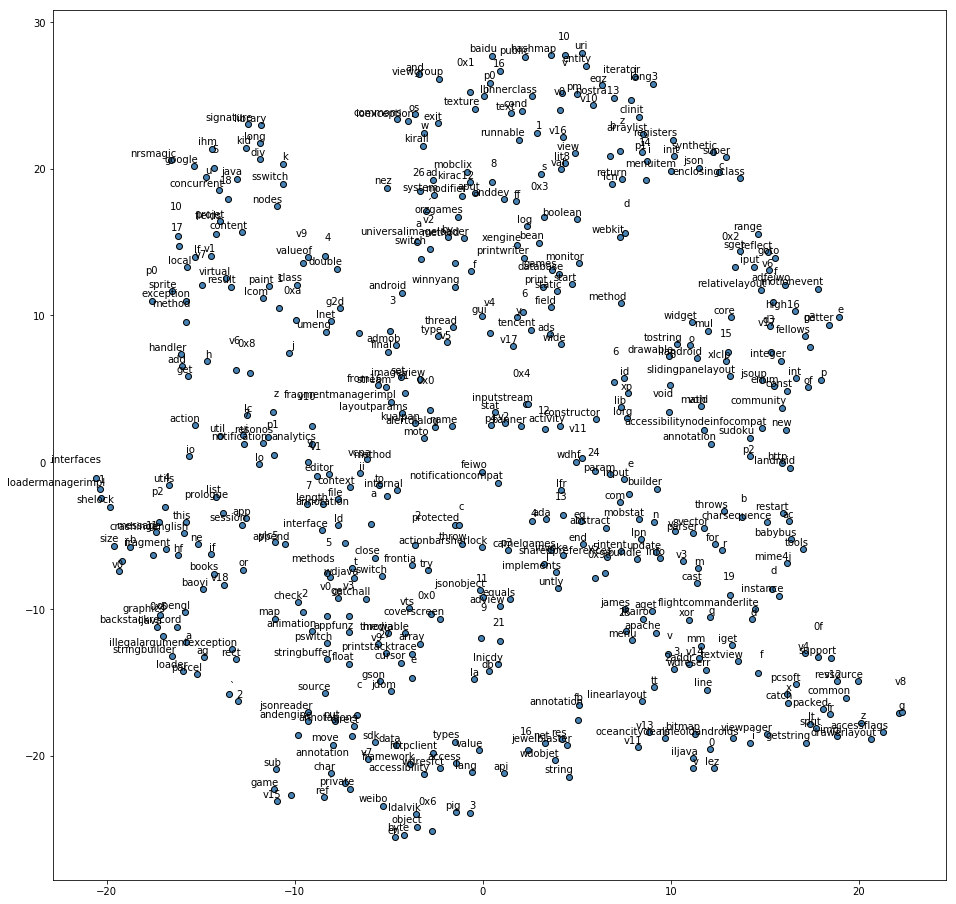

In [31]:
embeddings=model.layers[0].get_weights()[0]
words_embeddings = {w:embeddings[idx] for w, idx in word_index.items()}
tokens=[]
lab=[]
for word in words_embeddings:
        tokens.append(words_embeddings[word])
        lab.append(word)
x=TSNE(n_iter=1000)
vis=x.fit_transform(tokens[:500])
xim = []
y = []
for value in vis:
    xim.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(xim)):
    plt.scatter(xim[i],y[i],c='steelblue',edgecolors='k')
    plt.annotate(lab[i],xy=(xim[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
plt.show()

In [32]:
embeddings=model.get_weights()[0]
embeddings=embeddings[1:]

from sklearn.metrics import pairwise_distances

from scipy.spatial.distance import cosine
# compute pairwise distance matrix
numerator=embeddings.T @ embeddings

dr=(embeddings * embeddings).sum(0, keepdims=True) ** .5

similarity=numerator / dr / dr.T



distance_matrix = 1-pairwise_distances(similarity,metric='cosine')
print (distance_matrix)

[[ 1.          0.00460565 -0.00389671  0.01158851 -0.01085734]
 [ 0.00460565  1.          0.00452334  0.00931865  0.0043394 ]
 [-0.00389671  0.00452334  1.          0.00101268 -0.00567162]
 [ 0.01158851  0.00931865  0.00101268  1.         -0.00448287]
 [-0.01085734  0.0043394  -0.00567162 -0.00448287  1.        ]]


In [33]:
embeddings=model.get_weights()[0]
embeddings=embeddings[1:]
from scipy.stats import wasserstein_distance
for i in range(len(embeddings)-1):
    dm=wasserstein_distance(embeddings[i],embeddings[i+1])
    print (dm)

0.022493077302351595
0.03140343576669693
0.024022198840975763
0.00909158093854785
0.008088133204728365
0.012405599467456343
0.017272932967171074
0.014316664822399617
0.02318246359936893
0.011189686506986618
0.014687927253544331
0.015374623984098435
0.0077851502224802974
0.017817850597202776
0.017782355286180974
0.007190600270405413
0.017776664206758143
0.018611687049269677
0.020065409457311036
0.030515347653999925
0.017740257922559975
0.009770624060183763
0.009992787521332501
0.029419877007603647
0.008109097182750703
0.013876189664006234
0.020069642551243303
0.01580238714814186
0.04144595637917518
0.05310186930000782
0.0169657239690423
0.05361170251853764
0.013146535912528633
0.010401869006454945
0.017237985692918303
0.04153826590627432
0.014712806278839707
0.03291739742271602
0.023749986104667185
0.021638696454465395
0.010912166163325309
0.019995585083961487
0.013028409052640199
0.02822997411713004
0.026094067469239236
0.02319806832820177
0.00787880187854171
0.0102974156383425
0.00979

0.012311633536592126
0.024756669159978626
0.02159610907547176
0.017911975644528868
0.010530439205467701
0.01698472984135151
0.022245917329564692
0.006142848962917924
0.010380432941019535
0.022591186407953504
0.02204362540505827
0.0214250962715596
0.010727913724258542
0.024398727668449284
0.009302127547562121
0.016754657216370105
0.02440046644769609
0.027989881252869962
0.01638136487454176
0.023054440692067146
0.014180772192776202
0.009141570609062911
0.023196765035390855
0.04489429574459792
0.020439058542251587
0.022748997621238227
0.028077508322894573
0.020038316864520313
0.01055868468247354
0.01379258227534592
0.014235157519578934
0.021361989527940748
0.037514516897499565
0.029342572763562204
0.022026362642645833
0.017342085484415293
0.028593666385859248
0.039630569890141486
0.03935645408928395
0.02702462449669838
0.04954176992177964
0.020332812564447522
0.01247375993989408
0.01837867284193635
0.022151534212753177
0.022448618663474917
0.02481247223913669
0.015636854618787763
0.010500

0.033325730729848145
0.015336430305615068
0.010647669853642582
0.028199397958815098
0.018790268152952195
0.016772041469812395
0.009465321898460388
0.019505530502647164
0.011824840819463132
0.02055614199489355
0.017543055629357696
0.019062607921659945
0.0182527095079422
0.01803893782198429
0.017886125668883323
0.006322848470881583
0.03582625011913478
0.027808679454028602
0.013580115325748921
0.03506000675261021
0.029311129217967392
0.022196174832060937
0.023312335275113585
0.015154268126934767
0.02137674456462264
0.023029046831652526
0.0179287641774863
0.00903851641342044
0.02428321987390518
0.010037518106400965
0.015051627345383168
0.014700080081820489
0.033787753060460085
0.006676704064011574
0.02198117822408676
0.009579052310436964
0.026223985012620687
0.028680801391601562
0.016834257962182162
0.017595174023881555
0.015095903351902962
0.020931235514581207
0.01054535135626793
0.012093219533562662
0.050291523244231945
0.03055067462846637
0.01691733058542013
0.030243003927171233
0.04394

0.013114550290629266
0.018681797431781888
0.018322448059916497
0.012491338700056077
0.013813273049890993
0.02074793661013246
0.020163867343217137
0.008862536726519467
0.019613288203254343
0.012941277027130124
0.012685349397361281
0.016448372416198252
0.020985049195587635
0.025542629742994902
0.04457387351430952
0.05603386089205742
0.05963386883959175
0.031866357382386926
0.031028493866324423
0.02477400526404381
0.008239275217056275
0.023542110994458198
0.023905238509178167
0.010712741035968065
0.022388946916908025
0.00566696268506348
0.026461005304008724
0.007737326389178635
0.025032913126051423
0.0291955754160881
0.016018479689955713
0.02113056220114231
0.01952274851500988
0.024448867468163372
0.011171976896002887
0.01482006423175335
0.014892413094639779
0.012184874713420868
0.03720093630254268
0.028433624887838963
0.024860973050817844
0.04604867827147246
0.020295460103079675
0.0064685052726417775
0.007852465752512217
0.014825150743126871
0.018212524242699146
0.02632886036299169
0.023

0.01084357458166778
0.03130595367401838
0.01726841344498098
0.016284841531887653
0.01611306420527399
0.04080144073814154
0.005343870446085929
0.020151637867093085
0.01814650259912014
0.0183378528803587
0.015295022074133156
0.011460404191166163
0.024130303598940372
0.012274981290102006
0.015789090655744076
0.019051363505423066
0.050903058424592015
0.020585566805675626
0.014063772978261113
0.015005057584494351
0.03156966781243683
0.019799730554223058
0.016398596018552782
0.015348236635327339
0.0036239840090274813
0.021435534209012987
0.011047939304262401
0.018120115902274844
0.020901851216331126
0.025049406150355936
0.02872953820042312
0.017721651075407862
0.010277828387916091
0.029978895001113417
0.03297726288437844
0.01513756541535258
0.014417530503123999
0.005837384238839149
0.017438933718949556
0.042083188984543086
0.02717263037338853
0.01216880134306848
0.010023442283272744
0.034442056389525535
0.03162693977355958
0.007497502863407134
0.020746131986379618
0.016917208209633827
0.0087

0.016081699449568988
0.017786244163289666
0.010665315156802536
0.02705622953362763
0.015965307317674163
0.019289908232167363
0.02708717784844339
0.010560353193432095
0.024721061158925296
0.02781700580380857
0.009319243766367438
0.0195082935038954
0.015153296757489445
0.019476958829909564
0.022524019703269005
0.029771590512245896
0.023777208570390937
0.00995857357047498
0.010954473353922366
0.010444068955257537
0.01111228368245065
0.024441380100324747
0.007966658286750316
0.023208034597337248
0.013164766738191247
0.020358892390504476
0.01165545992553234
0.02626757733523846
0.02779059000313282
0.02058656252920628
0.042080283164978034
0.039783014357089995
0.007724088430404664
0.01264750026166439
0.014120849221944811
0.019446613173931836
0.010991720808669923
0.012082689767703414
0.03899452816694975
0.037407460343092676
0.024203512351959944
0.020965599734336142
0.02703847410157323
0.0165916008874774
0.017921024654060605
0.04551013414748013
0.04645018163137137
0.012269416358321905
0.03918522

0.013940254598855973
0.016833488829433918
0.030935001466423275
0.015808454621583222
0.024348157923668626
0.02458035917952657
0.02422408889979124
0.01035260669887066
0.016449570283293725
0.03150093480944634
0.02509928308427334
0.03405999895185232
0.019314774218946697
0.01016055941581726
0.006211120868101717
0.029250385658815502
0.020810169912874703
0.0070277579128742215
0.01826357524842024
0.031634694337844854
0.024925532191991805
0.016954117408022284
0.011643915297463536
0.020287301810458302
0.01628245133906603
0.012243903940543532
0.016668726503849027
0.009011187963187693
0.010864500608295202
0.01380494749173522
0.010643831361085177
0.01638298397883773
0.024865645542740823
0.018532668054103852
0.015541542228311299
0.01299126176163554
0.019992202753201127
0.012637559836730362
0.015138244815170766
0.00592609983868897
0.024776215991005303
0.022004300728440285
0.025038431771099566
0.01331943655386567
0.017400965141132475
0.0071127500385046
0.014188988460227845
0.010009716963395478
0.02497

0.011287154071033
0.028542694449424748
0.03674335344694555
0.010862996568903327
0.009717685217037796
0.01454690438695252
0.013645382691174747
0.01505469363182783
0.016545943077653648
0.018794506043195727
0.010202408395707609
0.047687724232673645
0.02024929486215115
0.031122036697342995
0.02190979043953121
0.02616993831470609
0.012278036726638675
0.013725183019414545
0.005298701766878367
0.03672961303964258
0.04134018421173097
0.012307200161740185
0.014970607403665783
0.019668607646599414
0.016032970324158666
0.007024412974715235
0.009204293880611657
0.01913578864187002
0.02367832320742309
0.01549299736507237
0.01162474825978279
0.008241446688771248
0.018973995931446552
0.0138142641633749
0.010526463715359568
0.00979319903999567
0.011423902353271844
0.01708604283630848
0.013870354928076268
0.026251043472439048
0.014138595759868625
0.021036233752965927
0.007198545522987843
0.008114715013653039
0.015214834641665217
0.00900675030425191
0.011364376731216905
0.01342016737908125
0.00896536726

0.0223526680842042
0.022415809612721205
0.005785716418176889
0.010071963258087634
0.010388133674859999
0.01888844529166818
0.01641394617035985
0.02405729070305824
0.02407567910850048
0.021819559019058944
0.008242911566048861
0.01568062510341406
0.014259571768343448
0.006818360090255736
0.013155397633090616
0.018846167763695118
0.00882562380284071
0.037755337357521054
0.01983906552195549
0.05153368003666402
0.009201367571949958
0.034955773316323754
0.016765991412103175
0.03222042992711067
0.04459978435188532
0.012275976780802013
0.014125401619821787
0.013976621441543104
0.021819963306188583
0.024176308885216713
0.012063194671645761
0.010339719848707319
0.016246822290122507
0.016123758628964424
0.016173874586820604
0.01377718113362789
0.01794741228222847
0.005930056236684323
0.01780680473893881
0.016935055144131184
0.01621457226574421
0.013389449287205937
0.01734649371355772
0.023932160809636116
0.015429404657334087
0.015053712949156762
0.009802937228232625
0.036864305753260856
0.0168258

0.015051953587681056
0.023920557321980597
0.007789057539775967
0.017736654914915564
0.021883902512490748
0.018617354705929758
0.020209318771958355
0.015698792692273852
0.022648991737514734
0.015084588155150418
0.03725289814174175
0.04728229222819209
0.035458189295604826
0.010734830470755697
0.013557873852550986
0.012609235942363739
0.01621282771229744
0.02345530018210411
0.007009038841351865
0.01523561184294522
0.014708437304943802
0.012547880224883555
0.012780892755836248
0.01589228203520179
0.01501604150980711
0.013475981820374726
0.027258385345339777
0.021868810942396524
0.020875801844522358
0.02194571914151311
0.008637356944382191
0.03431405001319945
0.03827034691348672
0.0204951714258641
0.015501231886446476
0.009878583159297703
0.012649799231439832
0.01855157595127821
0.0108048340305686
0.012862568721175194
0.026250281929969786
0.014071242883801462
0.01368106249719858
0.014333460107445718
0.013039514608681201
0.018170887604355812
0.01744361445307732
0.025851195305585863
0.0145924

0.016201469907537104
0.0114570829551667
0.01823958279564977
0.0251637477427721
0.021464394032955175
0.02547295726835728
0.012575356662273404
0.01514257229864597
0.011872977903112768
0.021061181789264083
0.050967370904982094
0.025564090954139827
0.008008904894813894
0.015711086709052323
0.0466045212931931
0.014265135908499359
0.023918216535821556
0.012551138130947945
0.04064536062069237
0.018592390138655903
0.01329597607254982
0.017038100585341456
0.040449995920062064
0.01655009891837835
0.019132265076041224
0.01607736158184707
0.01737992879934609
0.04653326319530607
0.04365209462121129
0.030109620513394476
0.03345214915461839
0.035785730881616476
0.03690842739306391
0.021812940947711468
0.013776818150654437
0.04135490213520825
0.0469819625839591
0.036523912288248535
0.032637550542131064
0.018115555122494697
0.019800529396161434
0.009783216658979656
0.01212544315494597
0.01497379797510803
0.013542388426139954
0.009058085130527615
0.015172855556011201
0.023262584395706654
0.0082160279154

0.011161601170897484
0.024481216073036195
0.012373430514708161
0.00899920710362494
0.011318880831822753
0.028725514328107236
0.01491634752601385
0.008504904992878438
0.0339657885953784
0.01372732426971197
0.020943398773670192
0.019865390751510857
0.007940729800611734
0.02560208328068256
0.03209375669248402
0.02124689468182623
0.02660549934953451
0.02588688330724835
0.006864175852388143
0.011850877944380046
0.012746777385473251
0.015114297438412902
0.015996602643281222
0.008103353064507246
0.00991499051451683
0.016957040363922714
0.012292727502062915
0.00679258368909359
0.01567418109625578
0.01231237673200667
0.016040521068498494
0.012930065067484973
0.015975912893190978
0.006763246189802885
0.02052113199606538
0.02218410479836166
0.0073240624740719806
0.01724870107136667
0.02464683800935745
0.0037214759737253193
0.019702457915991546
0.04721946408972144
0.049755128845572476
0.0322691376786679
0.007242332817986608
0.0200773723423481
0.009789609536528587
0.026229650154709818
0.03577420115

0.0100132477004081
0.009456727653741837
0.03272741949185729
0.012365475203841923
0.015325818583369255
0.007571749622002243
0.026807768270373344
0.025538738071918483
0.026518965093418955
0.017237040773034097
0.013283889740705488
0.038011123146861794
0.019665565760806202
0.011505595268681647
0.024771429970860483
0.02221208792179823
0.012005858216434717
0.012653806153684857
0.021267395839095114
0.03199104946106673
0.02769984100013971
0.018116204254329204
0.03459410518407822
0.011889190785586836
0.02029706398025155
0.009595488943159581
0.015471888519823552
0.013159274309873579
0.024106010794639587
0.011973766796290874
0.009321184176951647
0.014374201046302916
0.013566056033596395
0.016818248853087425
0.008684543147683145
0.02146442886441946
0.042037802282720804
0.04085359489545226
0.01008199700154364
0.00733118043281138
0.03388112816028297
0.019561076862737538
0.025406432896852495
0.0047700956463813775
0.03618466379120946
0.009254804998636245
0.013849485386162996
0.02389344498515129
0.0183

0.01745188981294632
0.017620958061888813
0.01275342404842377
0.011722957715392113
0.012371857091784478
0.008596855774521827
0.017788394540548324
0.02619929066859186
0.02275048871524632
0.017969694919884205
0.010164178162813188
0.01670641805976629
0.020984822511672975
0.010921982675790786
0.014053577603772282
0.02461030040867626
0.019973909389227627
0.01782312151044607
0.012429635971784592
0.01952634379267693
0.03783707525581121
0.01724526546895504
0.036116321384906766
0.03784730508923531
0.019801732897758485
0.010540948063135146
0.014534134045243263
0.026782174408435822
0.03819216229021549
0.016997961839661003
0.01080142087303102
0.0352288544178009
0.035117525793612
0.020010318141430613
0.009243295155465603
0.010528496187180282
0.0076384484767913815
0.024439776688814162
0.019573323428630832
0.019909030571579937
0.03232859955169261
0.01677769268862903
0.0171376783400774
0.01603348641656339
0.00973484250716865
0.009861964359879495
0.007218620739877226
0.012825814075767994
0.0158314485102

0.01970848646014929
0.02858823798596859
0.012253205105662345
0.022886671125888824
0.015034390194341541
0.016007080068811776
0.03308221958577633
0.011878303531557319
0.014471453800797464
0.015319472923874857
0.012939672730863093
0.006862556375563145
0.024878583662211892
0.029051497299224138
0.027947193291038275
0.02179517317563295
0.022822519764304165
0.029786274954676627
0.024082889035344127
0.009953954629600047
0.005760752595961094
0.01024443842470646
0.019324671104550363
0.01358046568930149
0.013594731129705905
0.018985839560627934
0.011924241296947002
0.01083185840398073
0.015404842095449565
0.010266784625127912
0.017798643093556166
0.018806447833776475
0.0108353185467422
0.019206122774630786
0.01098819086328149
0.01586049245670438
0.011976425722241401
0.022002875059843066
0.014162104576826096
0.012338276579976083
0.011273002810776235
0.023216123320162294
0.06863626763224602
0.04320646859705448
0.014567660167813301
0.007503385096788406
0.027092964947223665
0.02391682006418705
0.0201

0.017747705057263374
0.038014354882761836
0.015436456678435207
0.016409698501229284
0.01086183306761086
0.012239790009334681
0.014559421129524706
0.016395999304950237
0.0064208397641777985
0.00974088180810213
0.008357812650501726
0.017632189299911262
0.01760302288457751
0.022169988043606283
0.014947274327278137
0.03565697446465493
0.01194806080311537
0.03470327090471983
0.011619253177195787
0.013826128840446471
0.01905360398814082
0.025092737376689912
0.02060494958423078
0.019472188176587225
0.03354553831741214
0.038288767170161005
0.010704046534374356
0.025900685414671897
0.013825679803267122
0.024297185987234113
0.01847822666168213
0.012783707026392224
0.021051305253058674
0.03044713214039802
0.013638713443651794
0.009341925056651237
0.03281475882977247
0.03841169197112322
0.00767380716279149
0.005093002878129483
0.011635584058240056
0.018599361972883345
0.021718770358711482
0.02052093856036663
0.024782926868647335
0.020926452986896035
0.011793943680822852
0.01974806487560272
0.01293

0.02094562463462353
0.023034583032131194
0.02345157116651535
0.01623406782746315
0.0058242052793502815
0.01013894733041525
0.03749668262898922
0.05066311806440354
0.014911862090229988
0.01997341923415661
0.012432747334241866
0.00958050899207592
0.010338971391320229
0.03484506607055664
0.019370850920677186
0.01629472300410271
0.02175524868071079
0.016041694954037667
0.019747063145041467
0.013939360901713372
0.01720822900533676
0.026037024706602095
0.007636416703462601
0.009475619718432426
0.010092249140143393
0.007554151117801665
0.01116238012909889
0.009591382415965199
0.02438881522975862
0.01782344011589885
0.009914580546319485
0.017108970135450364
0.017906530480831864
0.04626764170825482
0.047282601892948146
0.011783676594495774
0.021039991825819015
0.012744266865774989
0.008140984503552318
0.033202728163450955
0.0092686259187758
0.01983909048140049
0.008601570129394533
0.027580805495381354
0.019354385510087013
0.024918817449361086
0.02222860464826226
0.011655199527740478
0.013225028

0.025619905767962338
0.010558778792619706
0.028791628777980804
0.007952184043824672
0.03379899058490992
0.021709905937314037
0.02443609312176705
0.03976218849420547
0.014806661568582057
0.020667093433439733
0.009976890869438648
0.010908621456474065
0.016343247424811125
0.0404790623113513
0.008204137906432152
0.01843840815126896
0.008721740543842317
0.030517516657710075
0.009235900873318315
0.01923814443871379
0.011001142673194408
0.007504856074228884
0.008674138924106956
0.011999376909807322
0.008806254435330629
0.026142109185457233
0.023130834754556417
0.03850899888202548
0.02833027020096779
0.018872668221592906
0.005874864291399718
0.02183296084403992
0.009508178010582923
0.01836765501648188
0.013803756469860675
0.01943647344596684
0.005503126606345179
0.022649191273376345
0.014447659673169258
0.0037886843085289
0.018391700647771358
0.01744769811630249
0.020630873600021003
0.02220019088126719
0.014861279539763928
0.014447812363505366
0.01624375693500042
0.018168254941701885
0.0197981

0.019132453063502905
0.018857259117066857
0.015700307954102752
0.02117188312113285
0.014954045740887522
0.012744810758158564
0.015349262673407794
0.01574379545636475
0.008367956383153796
0.014189932402223347
0.029614051431417463
0.038848132174462084
0.015719109540805222
0.02453481392003596
0.02801558263599873
0.022884778119623663
0.012469994276762007
0.007036653719842433
0.021061709336936473
0.01497979611158371
0.01597084291279316
0.007479139743372797
0.012010281020775435
0.007706414815038445
0.018186886562034488
0.017229882674291732
0.01472956631332636
0.013319738814607265
0.01770047727040947
0.03427031356841326
0.015108003281056881
0.0126178665086627
0.00521838441491127
0.008948541432619094
0.018762301933020357
0.03246869379654527
0.014627637714147566
0.014054931094869973
0.006959297182038427
0.005104019679129124
0.030631911754608155
0.023738492839038373
0.016514907777309417
0.01488676145672798
0.01701006554067135
0.016294859908521177
0.04242212101817131
0.029743048176169396
0.027404

0.01962537649087608
0.008342423290014266
0.012309638783335684
0.014771943725645543
0.022282188059762124
0.016637088591232897
0.01506906682625413
0.006813929975032806
0.014091508835554123
0.016976530104875567
0.015110036730766297
0.020908316969871523
0.02309064958244562
0.013619348965585231
0.0031915239989757545
0.014598745107650758
0.02858366221189499
0.029540627077221875
0.01845869394019246
0.021973257418721918
0.021103266254067422
0.019143731379881502
0.012897569173946978
0.02071850560605526
0.014424415864050386
0.011170161701738832
0.011756145395338535
0.007385056652128698
0.02264853604137898
0.0302856762893498
0.01769932275637984
0.01144586130976677
0.019315312989056112
0.01887561157345772
0.02201907802373171
0.033359140343964096
0.030196064151823517
0.021930613927543162
0.01102795503102243
0.013937496533617377
0.016242087632417676
0.016454771906137467
0.02112587094306946
0.011017733067274094
0.013626777753233909
0.013602564111351967
0.022676904499530796
0.00601162314414978
0.02389

0.010284626763314009
0.016732592601329088
0.036615303810685874
0.024844418000429868
0.013058962486684323
0.01405274048447609
0.01808792520314455
0.011818224564194681
0.013342208182439207
0.012006937945261597
0.007862354116514326
0.020636506704613568
0.02211061529815197
0.013153223693370821
0.013562121614813802
0.013371818978339434
0.016928090993314982
0.014758166670799256
0.03607648322358727
0.014367968821898103
0.016550405556336047
0.025695400498807433
0.01591287087649107
0.010642094910144806
0.018096660450100898
0.026654474716633562
0.03694754494354129
0.009478596411645415
0.02192732449620962
0.00756841702386737
0.04085344998165965
0.009250854887068274
0.020502249337732793
0.010378945246338847
0.013832473196089268
0.040048824995756155
0.026138787902891633
0.0123429661616683
0.007999979937449098
0.03172990987077355
0.0074322993401438
0.03867479134351015
0.027376771159470084
0.01746418531984091
0.04277043598704041
0.0066444596741348505
0.021801351103931662
0.025219488656148314
0.032128

0.03221542658284307
0.01801971774548292
0.014613858424127102
0.017845179000869394
0.015654010372236373
0.01689095119945705
0.03246062593534589
0.03121470971964299
0.006187842786312103
0.025839527510106562
0.010804396681487562
0.012551015522331
0.00741365561261773
0.01834139619022608
0.01838253736495972
0.013944841176271438
0.015526350215077398
0.013410058664157988
0.009621503995731473
0.012004445865750312
0.025219362601637842
0.02039596661925316
0.01993367769755423
0.01604534103535116
0.04432323314249516
0.04224951434880495
0.03447964582592249
0.03746966049075127
0.017779536731541156
0.00857898988761008
0.005734515842050314
0.005397901637479663
0.020089177414774898
0.03270567310974001
0.021328989788889884
0.015141035756096244
0.0248424815479666
0.015000715712085366
0.010674503492191434
0.012386239366605881
0.013798954850062727
0.035516482591629026
0.027734444104135034
0.007524110702797772
0.008465527789667249
0.014163046702742575
0.0205870158970356
0.015816990146413447
0.01371934199705

0.008768746023997664
0.01612293776124716
0.027296943310648202
0.05193167543038725
0.050624246895313266
0.017027935571968553
0.010864073596894742
0.00912515362724662
0.028214727248996496
0.042493782192468646
0.02351137856021523
0.015757081704214214
0.015600097877904772
0.015022474387660623
0.019446093356236815
0.01603319309651852
0.017976587079465388
0.018999159522354606
0.03893561959266662
0.02954409420490265
0.02464376240968704
0.008290474861860277
0.03169848248362541
0.004882416129112244
0.021671228110790253
0.009856689721345903
0.010786484554409982
0.016143067553639413
0.01497914418578148
0.010316569358110426
0.006704826280474664
0.022547825798392297
0.024521854147315024
0.02271282225847244
0.008562197908759117
0.01845006123185158
0.015828030183911324
0.009602945856750011
0.013819787092506888
0.018024254543706777
0.010620084451511504
0.016664077900350092
0.014548053173348308
0.01593957194127142
0.011906061135232446
0.010423376969993115
0.02063300721347332
0.0053549779579043395
0.018

0.007661417499184609
0.01053948812186718
0.02162452414631844
0.008624346740543841
0.013854101486504079
0.010496847517788411
0.025352839939296247
0.017369564622640606
0.011643728241324426
0.024878911674022675
0.017213942483067516
0.02729889303445816
0.028250288963317872
0.010766040906310082
0.010357325524091722
0.00553312934935093
0.011572642996907235
0.017085126321762803
0.014874172303825617
0.013503621146082879
0.007727931533008813
0.010193393100053072
0.019441104494035244
0.01502048932015896
0.01162727391347289
0.01034660399891436
0.010614871466532349
0.01775804739445448
0.01970193488523364
0.01647198311984539
0.012182756699621678
0.014097484573721886
0.012782849371433258
0.01754190996289253
0.02078068582341075
0.013268961571156979
0.015439070854336025
0.013462967239320276
0.018092258460819723
0.02070326115936041
0.012005121493712067
0.018982381792739034
0.011521657183766366
0.014146033488214017
0.011197136715054512
0.008681108243763449
0.016453885380178692
0.016768204141408203
0.028

0.012172121554613115
0.0251865666359663
0.01983213759958744
0.014671905338764188
0.017878514900803565
0.043143245205283176
0.05623203394934535
0.022712948080152277
0.013932852447032929
0.011574458703398703
0.02217432335019112
0.015194390714168546
0.02269806265830994
0.02801342122256756
0.015129615738987922
0.01876665293239057
0.014095963397994637
0.014719587797299025
0.031571225496008985
0.01840452030301094
0.014457436092197896
0.03821094557642937
0.01661255732178688
0.016668618284165857
0.01718220915645361
0.008319423720240592
0.01345976539887488
0.012303698947653176
0.010189105104655028
0.016330394055694343
0.011528688669204713
0.021917736623436216
0.019407356763258575
0.004356707865372301
0.015747837861999868
0.014237849647179245
0.013699883967638014
0.008298337459564209
0.020036431262269616
0.006067869905382395
0.016406640550121664
0.003968691453337669
0.02085285345092416
0.02816613940522075
0.014390703476965427
0.015715151373296977
0.011200014734640718
0.012428586883470417
0.01727

0.029113849112764004
0.03082420253194869
0.024904008070006967
0.018979244213551284
0.01298163370229304
0.017020804202184086
0.010687149735167621
0.02137645906768739
0.01734774666838348
0.01727740615606308
0.014185160771012307
0.023429357632994655
0.014653474278748038
0.027044958015903835
0.028849557181820272
0.02735595423728228
0.012467338331043718
0.028210450708866124
0.028662986541166904
0.011066855723038317
0.018784299679100516
0.028659774735569955
0.010027859639376399
0.009853235399350523
0.02507484746165574
0.028977124020457268
0.021108800359070302
0.019264873489737513
0.01619965024292469
0.023088967800140383
0.02792446352541447
0.014859732985496522
0.02720358222723007
0.01243372680619359
0.011519143637269736
0.009331504674628375
0.010121467011049391
0.012605502735823395
0.039302244316786535
0.029162250086665155
0.03036905284970999
0.03622431298717856
0.02672541784122586
0.03535103527829052
0.012218046374619007
0.011929940758273005
0.006908591510728002
0.01545083224773407
0.031983

0.0161283390596509
0.04209669530391694
0.03214896386489272
0.023247604351490737
0.019216593028977515
0.013223883742466568
0.009107584226876497
0.016901723481714724
0.02630297662690282
0.039470551256090405
0.03304950008168817
0.01972205080091953
0.013508235290646552
0.01790744848549366
0.03379652146250009
0.027842533960938456
0.016798175359144806
0.019201661879196762
0.021905334107577803
0.012495156098157167
0.016157862450927495
0.015449829027056695
0.01214262414723635
0.014345906674861908
0.01991510055959225
0.024352251924574377
0.023960917629301547
0.019100758619606497
0.018518734350800516
0.017533124610781672
0.04994796272367239
0.04231845671311021
0.02118249414488673
0.01763387881219387
0.0312862565740943
0.03223693799227476
0.03351311697624624
0.02667280398309231
0.025852552661672235
0.048271755501627926
0.017176979407668113
0.01791865676641464
0.017248452454805375
0.026446024142205718
0.028450858779251575
0.013110398035496473
0.013918950501829386
0.01558819664642215
0.009492733608

0.0334608655422926
0.02328537632711232
0.02489921925589442
0.020626834267750385
0.02565534599125385
0.033577088639140135
0.025401446223258975
0.01846173331141472
0.02732485979795456
0.030636760219931603
0.020177960209548474
0.025165276601910588
0.02234993260353803
0.018349841237068176
0.02814120538532734
0.03715330548584461
0.014989174157381059
0.011701019853353499
0.021144526079297066
0.04518657848238945
0.027602768689393996
0.014085574820637704
0.013293057680130003
0.02145998515188694
0.008864221908152104
0.05451121050864458
0.06366825010627508
0.022351307608187203
0.011158626526594164
0.03414910323917866
0.023853064328432084
0.020331135392189028
0.0193264689296484
0.01860828530043364
0.015320464037358759
0.014234597980976106
0.03500741012394428
0.008575168624520301
0.009753399714827537
0.00993516929447651
0.01955335028469563
0.04115217179059982
0.02141595408320427
0.021015184745192532
0.009395300596952438
0.019133930280804633
0.009405079111456872
0.015325274318456648
0.0137571662664

0.007393697276711463
0.008290800638496876
0.015026753675192597
0.00994451539590955
0.042704300954937935
0.010072351619601249
0.05889116544276476
0.020730092748999597
0.025663926359266044
0.031281791348010304
0.01612117453478277
0.008031564718112349
0.012102296203374862
0.013243827456608414
0.006807168619707228
0.019214714504778387
0.007139692828059197
0.016934686200693248
0.011380271567031742
0.02091537043452263
0.03818719945847988
0.038908534497022626
0.022877413034439083
0.015025634504854678
0.01340042781084776
0.04154341034591198
0.01901368899270892
0.028336636908352378
0.014100953098386527
0.01749067027121782
0.032314750552177425
0.03503631427884102
0.04154803492128849
0.031086171604692937
0.028631583973765373
0.01744950278662145
0.00885322694666684
0.016998312855139374
0.028512160247191786
0.020085576409474018
0.013861347129568458
0.019653990492224695
0.024321595579385756
0.009047445841133595
0.04126904038712382
0.03559218421578407
0.01735594072379172
0.015063117677345873
0.039604

0.04321631183847785
0.019672729168087245
0.024139017425477503
0.013258620165288448
0.0047837536782026294
0.01715566236525774
0.003202954865992069
0.034132158756256095
0.049766340758651495
0.04026404870674014
0.028990121465176343
0.02140247682109475
0.027890324592590336
0.008301167562603951
0.02464370122179389
0.023967341333627698
0.04230523444712162
0.045678491704165936
0.018247841112315654
0.021094942837953573
0.013431450258940459
0.009839359764009714
0.023536030249670145
0.024957174342125656
0.017136822920292616
0.012231493880972267
0.015669090067967774
0.013444052590057255
0.02528609409928322
0.02465822733938694
0.02533123367466033
0.015621760627254845
0.03141161855310202
0.027357146563008427
0.010328038735315202
0.008237644052132963
0.009487377712503076
0.012094170134514571
0.010284811072051526
0.023828198388218882
0.054335492849349964
0.03992767133750021
0.046635836968198424
0.01283762510865927
0.02020408799871802
0.013421820569783447
0.01580267455428839
0.010654512699693442
0.017

0.01588813764974475
0.015852753212675454
0.014299009600654243
0.007435210701078176
0.008176546543836594
0.012074497994035482
0.02287682890892029
0.0266606068238616
0.022867707442492245
0.03880714597180485
0.04577890913933516
0.024637608649209143
0.018090289132669565
0.01847583428025246
0.015694408677518368
0.01182236410677433
0.012922754883766175
0.0281122475862503
0.01773156151175499
0.027186034061014656
0.01621863734908402
0.009993794048205018
0.024231287278234964
0.01237274263985455
0.036409383313730365
0.03794880169443786
0.02274216073565185
0.007433190569281578
0.019125062692910436
0.011581515241414308
0.023617709614336492
0.02479809019714594
0.03405186999589205
0.010534131806343792
0.03529446646571159
0.03326098718680441
0.026341969473287465
0.004972780728712679
0.014280152320861815
0.013451629830524323
0.025546954851597546
0.01797060063108802
0.0310426892247051
0.030239209020510315
0.010670055355876683
0.016988029330968858
0.017177533078938722
0.024922540690749888
0.028248042240

0.01872755065560341
0.015247683972120283
0.03555482923984527
0.005274693667888641
0.011168939247727393
0.03848260752856732
0.010108541697263718
0.019314561784267426
0.020655374974012375
0.018422851711511614
0.015832849591970444
0.017198010906577108
0.02029422335326671
0.006642714887857438
0.016264650225639346
0.031622336804866785
0.025583937391638754
0.005699498206377029
0.009709610417485236
0.008921033143997191
0.016013162583112715
0.015709646046161655
0.03124714270234108
0.024941041320562365
0.014217278361320496
0.009787612780928611
0.00311993844807148
0.010029727220535278
0.0135589387267828
0.03117993697524071
0.02815054580569267
0.01528198681771755
0.021230995655059814
0.033996225148439405
0.014035642147064206
0.01729801446199417
0.011684989184141159
0.01658450812101364
0.012852515280246734
0.012034663558006285
0.02634269669651985
0.01319890171289444
0.008512263000011445
0.016730112582445146
0.01374853067100048
0.016959140449762346
0.015160900726914407
0.01754477620124817
0.0191473

0.035083863884210593
0.027489781193435196
0.012960865162312986
0.015338704921305181
0.015344002656638623
0.012482240609824658
0.017211848124861717
0.017334785638377072
0.01800721054896712
0.022836078284308316
0.019064211798831825
0.017525699781253935
0.01679517412558198
0.024477452877908944
0.013257994037121534
0.021147432504221794
0.006132423831149935
0.019128566421568394
0.007170681655406953
0.025042981654405595
0.011708860658109188
0.01279269102960825
0.018531057983636856
0.017433809489011763
0.013607284985482694
0.008241173438727855
0.02546964446082711
0.024029271770268677
0.013900935230776668
0.01773224766366184
0.016478469409048555
0.01710687396116555
0.006484511168673636
0.015145503263920545
0.007365176919847726
0.016214175103232264
0.021383414464071392
0.014506740495562553
0.00542690921574831
0.02046378832310438
0.00732031725347042
0.01954343351535499
0.015938369510695338
0.01295952256768942
0.009028382413089274
0.010659753577783704
0.022778710024431353
0.05611948184669018
0.02

0.024170973524451255
0.030008442327380185
0.010103311389684679
0.013891192525625227
0.009137783199548721
0.017742155119776726
0.02319741509854794
0.03249354497529566
0.010912615805864332
0.014317172905430197
0.017977685108780863
0.019541021110489963
0.01304589519277215
0.01158250621519983
0.029418669221922756
0.025768216094002126
0.027398784132674336
0.02767707877792418
0.02730330303311348
0.008544734679162502
0.008858647011220456
0.010243203304708003
0.014534348901361228
0.009566689375787973
0.011026315856724977
0.014897313993424179
0.011556262895464894
0.013967893458902834
0.02908829730004072
0.01853695237077773
0.006607558252289893
0.010259244637563825
0.013239342672750353
0.017606555111706258
0.022099666204303505
0.01363169550895691
0.026713175978511576
0.008926444035023452
0.017165997251868247
0.010039819963276384
0.017376762814819813
0.03992665656842292
0.015575206512585281
0.013540831208229064
0.021003163047134874
0.01487626270391047
0.01744820815511048
0.008677612245082855
0.01

0.011961972340941427
0.012258609943091869
0.022809430398046972
0.006725125387310982
0.01988537311553955
0.017075087688863278
0.0074369795620441445
0.01926192520186305
0.025640971679240468
0.011426860932260753
0.011617190856486558
0.006702033570036293
0.0056934120599180455
0.020069003384560347
0.0067297853995114554
0.0320917917881161
0.024983706604689362
0.016204551421105863
0.01327789090573788
0.006300149112939836
0.024837299436330798
0.009205212909728288
0.01163479178212583
0.018567228643223646
0.007510449085384608
0.018921063281595707
0.008877881988883018
0.007832470908761026
0.02183832214213908
0.021401669736951588
0.015437709307298063
0.015715966187417506
0.028176886681467294
0.02337034707888961
0.010730852652341128
0.012500544264912605
0.020992015302181248
0.011703632958233356
0.012778120674192907
0.011993101425468921
0.026318096928298472
0.012799832923337816
0.005577237764373422
0.018922019097954032
0.015413499623537063
0.015773553773760794
0.008609653450548649
0.0133799737319350

0.021212666295468807
0.02040384113788605
0.013651874661445617
0.0073303494602441795
0.020344650652259585
0.017903971113264562
0.02447915794327855
0.021949063055217273
0.023540531750768423
0.012150436546653508
0.030082087032496936
0.012471487745642662
0.021107100322842597
0.04568067491054535
0.03180287480354309
0.02493055462837219
0.020359543710947038
0.009976652450859547
0.01487529817968607
0.04625768042169511
0.03349176621995866
0.01320423106662929
0.02696168082766235
0.015155641129240394
0.011165930982679128
0.013445914583280686
0.020817869529128077
0.018318071123212577
0.028499358799308542
0.048289278708398345
0.0286201591603458
0.013443880062550307
0.022395347990095616
0.017977249994874003
0.011153846234083175
0.01329376436769962
0.017667523026466368
0.01886271391995251
0.014760907879099248
0.01577670550905168
0.02180471266619861
0.00933310673572123
0.011623330553993583
0.025273022800683977
0.016456731408834458
0.019845690391957757
0.010634193290024995
0.013272179011255502
0.014945

0.009290955541655422
0.025379842473194008
0.014503146801143885
0.04026161003857851
0.013412281870841978
0.043562999274581675
0.01895996043458581
0.01214567869901657
0.008097868226468564
0.023262072168290616
0.018018238339573146
0.03695435980334878
0.01882571619935334
0.016793061653152107
0.009006511978805065
0.0077737286686897274
0.015357908234000205
0.011773449741303923
0.0151464156806469
0.025389211624860762
0.02073329463601112
0.014154539629817008
0.010837415233254433
0.004416363313794136
0.017686291597783566
0.025225112028419972
0.01288850074633956
0.034590505762025714
0.029745091078802945
0.01803011288866401
0.028044836595654488
0.02864356162026525
0.017528002057224514
0.02698016972281039
0.021790976356714967
0.021448213281109928
0.02114047445356846
0.030224698781967166
0.015874438732862473
0.01649729460477829
0.012492030113935472
0.015723543614149092
0.03306593187153339
0.021342916414141655
0.026256796345114707
0.02463328614830971
0.015724141150712967
0.032361419126391414
0.01584

0.030423498060554263
0.04034412493929267
0.016504343738779424
0.004239876801148058
0.020540453447028994
0.014568070182576779
0.010741773527115583
0.0075846489053219565
0.01627947962842882
0.04163595009595156
0.01090005449950695
0.036805636063218114
0.02558309566229582
0.022185841016471385
0.015124283730983732
0.021819908823817968
0.02108143726363778
0.014016113383695482
0.012107762880623341
0.01844208878464997
0.012696983199566605
0.01353179095312953
0.00861285775899887
0.013095454312860964
0.023647017451003192
0.01194298774935305
0.02198762912303209
0.032593302149325605
0.025728335324674844
0.018470946233719587
0.020185518823564053
0.026733336644247176
0.01996436486952007
0.009170999098569154
0.014505258947610858
0.0035834199748933323
0.013839040324091912
0.016707407124340535
0.015106483269482853
0.01636492246761918
0.014926653914153576
0.024437841679900887
0.006224737409502268
0.01355474004521966
0.015781604405492547
0.021372627932578325
0.01160587090998888
0.013768759509548544
0.020

0.010298756882548332
0.014216288924217226
0.018662635795772077
0.009445392526686192
0.011083828285336494
0.0245355598628521
0.04032081523910165
0.010967046488076448
0.011703945882618428
0.016241474589332935
0.01929682125337422
0.017273555928841233
0.016894918819889426
0.046182206925004715
0.05089572966098785
0.037072703195735815
0.011439961707219481
0.011051310785114765
0.0051957756280899044
0.02078446983359754
0.010841446416452526
0.018373229634016754
0.02700693905353546
0.03907013051211834
0.016635098308324815
0.01857181377708912
0.018101012334227562
0.007533957995474338
0.03616624842397869
0.01744106044061482
0.00927047049626708
0.01539529822766781
0.009955801628530027
0.007118447497487068
0.030837817117571834
0.04617192838340998
0.013310608360916378
0.016492639342322948
0.02508418564684689
0.03383824094198644
0.014178695157170296
0.015577709674835207
0.012048245454207063
0.014878711849451064
0.01148550547659397
0.012359790317714215
0.014559218101203442
0.011579683655872941
0.017687

0.015503946878015996
0.013960609305649997
0.02822507731616497
0.03283364111557603
0.01435497645288706
0.02747683944180608
0.01599801732227206
0.01613047365099192
0.009770098607987167
0.010608739638701082
0.021666136337444186
0.023346034064888953
0.016977302404120567
0.016104646259918812
0.02499425644055009
0.019536117138341073
0.04149677036330103
0.016164487041532994
0.02514906241558492
0.02111841794103384
0.016074531152844428
0.015449661947786807
0.00836595110595226
0.009020031988620758
0.013138448866084219
0.02676087357103825
0.009103196952491998
0.012854293454438448
0.02744257743470371
0.022464453615248202
0.026485485024750233
0.024818044528365134
0.013409473281353713
0.020685411896556614
0.027635478088632225
0.01734554688446224
0.020533485477790235
0.033301579067483544
0.025444228388369083
0.020933273248374466
0.023483898537233473
0.015944223664700982
0.039811849268153315
0.017912096343934536
0.02728911843150854
0.011749181896448134
0.01202433444559574
0.024605786660686135
0.015782

0.021650817431509494
0.01731905504129827
0.007922254363074898
0.02455554362386465
0.010453487746417522
0.012500589154660702
0.013053128309547902
0.02477075424976647
0.0120917912106961
0.01536078620702028
0.011071901582181453
0.01651814659126103
0.008401285065338016
0.01147229513153434
0.01014707158319652
0.017401732411235576
0.021829567616805434
0.01238714000210166
0.0125247529707849
0.024562314432114363
0.024002533406019207
0.019522587023675445
0.014045334747061131
0.006937834108248353
0.012967541255056858
0.03777034995146096
0.023763626487925644
0.007679290417581796
0.01925191078335047
0.03150910474359989
0.026197976525872947
0.007742145657539368
0.018698521982878448
0.007467749249190091
0.011704239016398787
0.028762498078867795
0.022486244048923253
0.006244854908436535
0.010561353480443358
0.03762969211675227
0.05782490069977939
0.039340242138132454
0.006952863931655884
0.009933947538956999
0.02840584539808333
0.022830743156373498
0.018575877696275712
0.020692398585379124
0.01794041

0.015768757648766042
0.03653784119524062
0.02381547656841576
0.01072832681238651
0.018909391388297083
0.010148851340636613
0.011917498847469687
0.02168947272002697
0.04298768499866128
0.00921395104378462
0.05095895007252693
0.021372094191610815
0.032172920368611815
0.03111821180209518
0.013522283453494311
0.00826561227440834
0.016800562385469675
0.018071996467188003
0.012041459279134872
0.009881685627624391
0.016684788931161165
0.02547956495545805
0.017950531095266342
0.02485375478863716
0.0269967682659626
0.014287066366523507
0.017423873301595453
0.039411922357976435
0.017589374072849752
0.009409065358340738
0.009498918056488037
0.013716069608926773
0.034176053572446116
0.038347778096795085
0.01039418261498213
0.011101927561685442
0.032173111801967025
0.01967179998755455
0.014100892748683692
0.024410088080912832
0.031938946060836325
0.022103958018124106
0.011743162106722594
0.02545142313465476
0.005575108807533979
0.027815774176269768
0.007593267783522606
0.021184256672859194
0.013434

0.017774531804025172
0.014490289986133578
0.021079924143850806
0.020094319246709347
0.01020300593227148
0.030828711204230787
0.01685416102409363
0.019980779895558957
0.022509229695424442
0.014194088894873858
0.011622618511319162
0.01668110806494951
0.021207917109131814
0.009974853973835709
0.019102129805833104
0.0342475825920701
0.015789403580129147
0.018081847392022607
0.021619329228997227
0.007951308134943248
0.01821871199645102
0.0192434465046972
0.023524588160216808
0.020189631171524523
0.02146679330617189
0.020593158155679702
0.012389050610363486
0.01305350363254547
0.010350217018276455
0.01377877751365304
0.013959028758108614
0.011397382244467734
0.01221230924129486
0.009099039807915689
0.013890199735760689
0.016775771416723727
0.008176189474761487
0.014185241516679525
0.008245908748358488
0.013615072518587111
0.012205016613006592
0.029360608477145434
0.0192975421436131
0.016246674489229916
0.01332054603844881
0.02137591829523444
0.020072334632277488
0.018289386248216032
0.012520

0.020599074847996238
0.03503658194094897
0.010693492554128171
0.030193674936890603
0.016789644211530685
0.01578989252448082
0.018083893507719037
0.02766900118440389
0.009891385771334173
0.01806273497641087
0.027792501077055932
0.01895402278751135
0.01732686869800091
0.03827788941562176
0.020648134360089897
0.01846309411339462
0.01420144787989557
0.02360320002771914
0.02943332642316818
0.008299492113292218
0.008333621732890605
0.005524050863459707
0.018143816525116565
0.016681202594190835
0.016492450656369333
0.01392655954696238
0.012229841528460383
0.008428971236571669
0.012627354823052885
0.011073301173746587
0.01499859979376197
0.013529720809310676
0.022669841907918455
0.015309855807572603
0.006595538835972548
0.02060215696692467
0.03680723123252392
0.023561503365635873
0.028320318460464476
0.014861445501446724
0.027751714177429675
0.029873721441254022
0.024725190689787273
0.0329340385273099
0.045483469031751156
0.026064549945294856
0.009825362265110014
0.012365124747157095
0.0132516

0.016894232528284196
0.01300432956777513
0.009810122242197395
0.010707866819575428
0.01498325439170003
0.026905347127467394
0.02157513038255274
0.021119891433045268
0.03298185062594712
0.03993919235654175
0.033601593691855676
0.007858235109597444
0.01648548431694508
0.017486778274178504
0.01806805464439094
0.017422233661636713
0.014276922214776278
0.02329703262075782
0.024216480553150177
0.03196359388530255
0.032055316492915154
0.024833725951612
0.027847847901284695
0.03834604546427727
0.016542702913284302
0.019227677024900913
0.01089697349816561
0.032019256288185714
0.017160320328548556
0.014592198003083466
0.023010983224958183
0.021450940519571304
0.01711870483122766
0.010883561940863729
0.021523747593164447
0.01056038811802864
0.013491860404610631
0.015944721177220345
0.017889142967760563
0.01451311861164868
0.024375973036512733
0.014937226567417385
0.03153260378167033
0.03413968086242676
0.03841287479735911
0.018929468421265486
0.016055154055356978
0.02711321897804737
0.01600397936

0.05153460390865803
0.027450550347566605
0.021625444293022156
0.013404208514839413
0.00809897668659687
0.015619785245507953
0.028856552857905626
0.024581454042345283
0.016027914918959142
0.01633700937964022
0.014088415401056409
0.033941388502717024
0.018916041776537895
0.018468655273318292
0.015824191085994244
0.014748143171891569
0.03399192015640437
0.017448645504191517
0.011387287825345996
0.01339951204136014
0.017639853851869704
0.03032910525798798
0.05181874837726355
0.04410879723727702
0.015966431610286234
0.013701626844704152
0.02495964448899031
0.00346221812069416
0.021576686203479765
0.025162814650684595
0.008588556433096528
0.002116786409169435
0.009467574255540966
0.011133646871894597
0.006181847397238016
0.016329750139266252
0.02603497123345733
0.026655461173504594
0.014934709249064327
0.013933798903599382
0.026013021171092984
0.029773618187755344
0.03284595422446728
0.010163797996938229
0.017761219665408133
0.014678332768380643
0.02442265441641212
0.015798116009682416
0.026

0.009211651235818862
0.005609697848558426
0.011738437414169314
0.014633353427052496
0.026350798085331917
0.027530914172530178
0.008522241190075873
0.009374183043837546
0.0280868012458086
0.03448658809065819
0.007610756531357765
0.012623243406414984
0.031248364970088004
0.01808999516069889
0.008120829984545707
0.017429957166314125
0.015424263104796408
0.04094661809504032
0.033693927526473995
0.012548313289880753
0.014241594448685647
0.020231179520487783
0.013275901600718499
0.030212029442191125
0.020225368067622186
0.025636499375104906
0.02154155857861042
0.012213309481739999
0.009076149761676788
0.012885049358010292
0.02211669869720936
0.007978619076311588
0.016069329716265204
0.02781248912215233
0.011269863694906235
0.021335623040795327
0.01874527372419834
0.01847020238637924
0.017588390037417412
0.020887640491127967
0.008664946258068087
0.018947693705558776
0.013204036653041838
0.008463900163769722
0.038786758109927176
0.009246667288243771
0.018174030818045136
0.007968586310744286
0.

0.015375841781497
0.025871385633945466
0.013707184419035916
0.012384737143293023
0.007582710823044181
0.01031306628137827
0.017598656937479976
0.009515037573873997
0.024332968052476648
0.012249655183404682
0.009895578771829606
0.013770392537117003
0.019182185828685763
0.016715558152645825
0.024184297490864995
0.022931233746930957
0.019023460103198882
0.03330318927764893
0.017388697154819964
0.024203755147755145
0.012449382618069648
0.012518019229173661
0.017032905854284762
0.04083386864513158
0.037586145801469684
0.02967936652712524
0.02000037468969822
0.013924231566488744
0.009178704209625722
0.0216824596747756
0.017575604282319548
0.01659396942704916
0.020401997305452828
0.010275467112660409
0.0077863311860710376
0.013050518697127702
0.028128468617796897
0.043728704750537875
0.018673857254907486
0.020565961813554166
0.010353696811944247
0.006107660662382842
0.012412523338571192
0.01537038036622107
0.01865386413410306
0.00814666273072362
0.027212094515562057
0.021335541084408757
0.015

0.016401417925953864
0.017396324872970582
0.012284687906503677
0.015084688365459443
0.03538778834044933
0.05534024871885777
0.009590141475200655
0.015584006905555725
0.012445300817489624
0.02228061407804489
0.045394664630293846
0.00669981651008129
0.021146298572421077
0.02629232592880726
0.021057385206222533
0.005949635058641434
0.01993529163300991
0.023925249325111506
0.011722511844709514
0.01614902745932341
0.011895409598946572
0.024106320552527906
0.018174565397202972
0.01440071053802967
0.020548914931714533
0.016868960857391358
0.019823529943823814
0.024879166344180702
0.010080254590138792
0.027454847469925884
0.009229690767824648
0.008890107227489353
0.013915025861933827
0.02267022784799337
0.009134784480556844
0.00784233915619552
0.02377585330978036
0.009212906751781703
0.020018094964325425
0.03142933696508408
0.012112901220098138
0.012856934685260057
0.015230988385155797
0.020080035086721182
0.04090507859364152
0.010083920508623122
0.04536216799169779
0.02465080562978983
0.00799

0.01178906634449959
0.01781349591910839
0.009801093116402627
0.02174738943576813
0.023729277402162553
0.02313005328178406
0.013128891214728355
0.01086594983935356
0.03137319274246693
0.04875369966030121
0.0150220051407814
0.025668659806251527
0.005141032487154007
0.012177833542227748
0.01600407175719738
0.02339806854724884
0.01441701203584671
0.031978802382946016
0.017559389024972914
0.02067192234098911
0.007726309448480606
0.01751028709113598
0.009108618646860123
0.020979226008057596
0.025862788781523708
0.022494880855083464
0.02044534906744957
0.024979548901319502
0.051754921674728394
0.02150097787380219
0.010908281803131102
0.01299790684133768
0.012983793951570989
0.009872643416747451
0.015275248605757949
0.009138758899644016
0.0307241927832365
0.020628967136144642
0.034157750010490415
0.017310810834169386
0.023363611102104186
0.016591295739635824
0.015893616760149595
0.016964570432901383
0.011204469203948976
0.008561644330620765
0.018226444721221924
0.017998016253113744
0.024923090

0.0245181948877871
0.016077675810083746
0.03534933007322252
0.011705722846090795
0.025027250126004222
0.022685457719489932
0.006468679895624518
0.017997285071760415
0.017483553383499384
0.008354749530553818
0.011749531049281359
0.010267037712037564
0.013987840432673692
0.03236428247764707
0.01337489653378725
0.026627719216048718
0.028026337549090383
0.020112887164577844
0.012808988010510803
0.01568107008934021
0.03833560403436422
0.03432107525877654
0.017383110662922266
0.009160359203815461
0.017230116203427317
0.011910288967192173
0.015150307677686213
0.02613524589687586
0.006876010634005071
0.01532392092049122
0.008040438964962959
0.017050547152757646
0.007572666835039855
0.0152667167596519
0.011953720264136792
0.016862469725310802
0.003377151116728783
0.014369514817371962
0.007176353689283132
0.011250619823113083
0.021359725948423145
0.015336847119033336
0.01831896132789552
0.018726069713011384
0.026137398928403853
0.02865878315642476
0.029216157924383878
0.021352210734039544
0.0206

0.010725002270191908
0.020772072672843932
0.00969508495181799
0.016028364561498164
0.016043455153703687
0.011611657682806252
0.01877547511830926
0.008961700741201638
0.008593152556568383
0.013436634559184311
0.03509390456601977
0.009320910833775996
0.012614395096898077
0.008491401560604572
0.03151856851764023
0.03341299598105252
0.025993764726445077
0.015685193846002223
0.014812005450949071
0.01728735822252929
0.03134267730638385
0.021453154925256967
0.016244810447096827
0.03424621182493865
0.011657077679410576
0.017050325497984888
0.018677674420177936
0.017817428894340993
0.021087782829999922
0.015942617692053317
0.024872373789548877
0.014708954468369482
0.019345889706164597
0.014284410234540698
0.017455979622900485
0.020525344088673594
0.049680170416831974
0.006925256922841074
0.008012302219867706
0.008697477029636502
0.010551054729148746
0.02205147333443165
0.015227620676159861
0.00788986012339592
0.016894517093896867
0.03542838045395911
0.017108398629352446
0.02233362002298236
0.02

0.009888257132843137
0.005033391341567039
0.021376604959368706
0.009975781198590994
0.02412498258054256
0.021973475161939857
0.015081651834771037
0.012792295450344682
0.01243095863610506
0.017097825510427357
0.010541822807863355
0.020011094771325587
0.020618693903088566
0.022948835929855704
0.02176278042607009
0.007133722165599466
0.009431453468278053
0.01077407319098711
0.006464563542976977
0.016330544184893367
0.013996141543611885
0.03448941074311734
0.01625510691665113
0.009744862047955393
0.012396138487383723
0.02692019590176642
0.02465870473533869
0.024531754711642862
0.008077321248129009
0.01355291027575731
0.017591056087985633
0.009902049833908678
0.014633630076423288
0.036979175684973595
0.032465113000944255
0.015826769499108197
0.015963350795209406
0.019215654768049716
0.013892523245885968
0.02345907627604902
0.013859422598034144
0.0250315316952765
0.020923833874985576
0.013097745925188062
0.0057658567558974035
0.007756278710439802
0.011425584508106114
0.03261896814219654
0.02

0.043988541094586255
0.04038693914189935
0.04877053145319223
0.04647913593798876
0.01099405474960804
0.008320481143891811
0.011540219001471997
0.014434519782662393
0.020385801792144775
0.03660503029823304
0.015323832444846629
0.021552981622517117
0.017613655980676414
0.008602431882172823
0.003896566666662693
0.010994807351380587
0.01471688048914075
0.008622943796217442
0.013145330362021923
0.004278146475553513
0.01112629007548094
0.026026758551597598
0.026708072517067194
0.033569295238703487
0.007802482880651948
0.013110073097050189
0.013314879499375818
0.01318009290844202
0.019223135523498056
0.03261800659820437
0.024252884183079006
0.018698822520673276
0.009989692084491254
0.013769281655550001
0.007242724113166332
0.01212908560410142
0.011788727808743715
0.01395632945932448
0.01443399847485125
0.003624355234205723
0.007438412029296159
0.003619268909096718
0.01497111851349473
0.011454470269381999
0.01990708354860544
0.013553542038425802
0.010253863036632536
0.017545711109414695
0.0312

0.017754558846354483
0.010729377344250678
0.012762302998453379
0.00937982425093651
0.012217796687036753
0.005254894495010376
0.009354589739814399
0.02002219664864242
0.023354127351194617
0.02359033338725567
0.016206494858488442
0.0051787729840725655
0.009216352924704551
0.013531786203384398
0.008693369105458258
0.030234862305223945
0.018477898463606833
0.0115077406167984
0.022234805114567283
0.016886121220886705
0.012739100959151983
0.008583489758893849
0.013005031598731875
0.018472489900887012
0.028733494132757186
0.04025931227952242
0.03917231224477291
0.02822818383574486
0.02644879054278135
0.006806504353880884
0.008207969553768636
0.03177323155105114
0.008030802570283414
0.03989865696057678
0.048893336113542324
0.027415676042437557
0.013338589947670697
0.01161334807984531
0.00810967949219048
0.028948549926280976
0.040755233541131024
0.03986674384213984
0.03628540304489434
0.025536311324685812
0.011797679634764788
0.017061410890892147
0.012191027589142324
0.01741852615959942
0.00924

0.02210559309460223
0.019852296309545638
0.017353405663743614
0.014181290566921233
0.01150978822261095
0.02901974003762007
0.019527300260961056
0.017687385715544224
0.010084875114262103
0.0433494433760643
0.03251001415774226
0.007836969383060933
0.00946286926046014
0.021520496718585493
0.03165373932570219
0.028495250642299654
0.015927901770919562
0.02542889267206192
0.008155224192887545
0.006515836343169211
0.013007222441956401
0.025065061822533607
0.01404791111126542
0.014572126371785999
0.017605449631810186
0.006669929251074791
0.008866998739540577
0.008641533739864826
0.005417308956384659
0.008526027202606201
0.02231464721262455
0.04818475134670735
0.025719792395830155
0.014710206538438794
0.024939991533756256
0.028614504775032405
0.02431597630493343
0.014522062800824641
0.02471387665718794
0.010551015147939324
0.012187043856829404
0.01673524552024901
0.010420568473637103
0.010625264793634416
0.011799905449151993
0.020191064104437828
0.010142558626830578
0.017727613030001522
0.03033

0.013216132670640948
0.021486201416701076
0.027275310410186653
0.009746047528460621
0.02209155717864632
0.030431738775223496
0.013246719166636469
0.005763681791722774
0.0060240157879889004
0.036705847224220635
0.02353008300997317
0.01435021162033081
0.02000037766993046
0.0101003997027874
0.038751133158802985
0.02370050176978111
0.0146284069865942
0.014390765596181153
0.005312552861869335
0.016652425192296504
0.006266392674297094
0.03306246800348163
0.00934831462800503
0.025874552130699162
0.011170967342332005
0.00795211656950414
0.012940403260290624
0.02103929575532675
0.01580388452857733
0.008832928352057933
0.014925847575068473
0.01815483942627907
0.01218855082988739
0.012578695267438888
0.0150066826492548
0.017841678019613026
0.022980803344398736
0.02750514671206475
0.009004181064665318
0.025095558166503905
0.010577392950654031
0.014758141711354256
0.019469963386654857
0.026414656778797507
0.019932261714711783
0.05751232877373696
0.01871434263885021
0.008374152891337874
0.0214854402

0.016961267869919538
0.041877775173634293
0.022806800529360773
0.008362858183681965
0.014830665942281485
0.009934000205248594
0.01505012693814933
0.015355731127783654
0.03750041984021664
0.012582910060882569
0.017336128838360308
0.023391469754278662
0.024110076762735844
0.009393513761460782
0.03665185207501054
0.04182927692309022
0.016431371867656707
0.009135436965152621
0.021536064893007276
0.030297356331720947
0.013723925873637199
0.01700144521892071
0.007773976214230061
0.024352349713444712
0.019618988037109375
0.01132471449673176
0.017989118956029417
0.02817309703677893
0.03103676475584507
0.016451349668204784
0.0158758788369596
0.012763094250112773
0.013666866533458234
0.016653180122375492
0.015949361305683852
0.00821676142513752
0.021219126507639883
0.017297239508479834
0.018606788106262682
0.019544398598372936
0.017390975076705215
0.012016453500837089
0.008919672295451164
0.036343700252473354
0.03036184045486152
0.02466604351066053
0.023782054148614406
0.010487223789095876
0.022

0.010174168180674315
0.009393919073045253
0.010151250846683979
0.016951809450984002
0.04211465180851519
0.016770683228969577
0.03707974092103541
0.02011820711195469
0.01456669867038727
0.00840999917127192
0.012760469364002349
0.013657700270414352
0.03536077355965972
0.033234311453998085
0.03585653835907578
0.02943081990815699
0.00795371471904218
0.010930145904421807
0.020623082481324675
0.01490098796784878
0.013741497136652469
0.013214740902185438
0.021916477754712102
0.021706669963896277
0.02976020630449057
0.030415536463260655
0.028471897542476657
0.029550707712769513
0.018855988234281543
0.026214210689067843
0.02707367241382599
0.012918462837114932
0.008441099384799599
0.008276528120040894
0.015782965719699858
0.01444412022829056
0.02149609327316284
0.022625733166933063
0.02821849249303341
0.025779350474476815
0.01689959391951561
0.015803422033786773
0.01418299376964569
0.006671071797609328
0.04462324678897858
0.029755315277725458
0.018643738050013778
0.028790168650448318
0.03058248

0.02220504805445671
0.01301746405661106
0.015913980081677437
0.025510532036423682
0.02648414857685566
0.019560237973928453
0.009673724323511126
0.03425014540553093
0.049793814122676854
0.025833065807819366
0.01532612293958664
0.009057100862264633
0.02028251886367798
0.01854088380932808
0.01813562586903572
0.025451827794313434
0.008816571906208992
0.02298071999102831
0.018648237595334648
0.011006455263122916
0.010936233261600136
0.02217370201833546
0.020901839062571526
0.02197723910212517
0.024171844497323035
0.019170080870389936
0.021956595871597526
0.020989339053630828
0.01647343402728438
0.017513599246740345
0.01169113893993199
0.01596882860176265
0.025446624308824536
0.02774852458387614
0.01452844343148172
0.01370413894765079
0.022178737539798023
0.027011378947645426
0.021199279837310313
0.016304450668394564
0.026148004084825514
0.014290278032422065
0.00947821200825274
0.01231668102554977
0.024042029492557054
0.023000859841704368
0.023131014965474605
0.015732078487053512
0.023045674

0.009964054217562081
0.026424214942380786
0.01835087742656469
0.01179546229541302
0.013992193900048735
0.018303774669766428
0.01541270869784057
0.01625385941006243
0.018998057581484318
0.035834766644984486
0.013055828027427196
0.009091556631028652
0.00994327515363693
0.014849016210064292
0.01869175950996578
0.027403100393712524
0.018618090730160474
0.026368982903659348
0.01654213313013315
0.014963796036317945
0.02253950950689614
0.01870423713698983
0.03648729380220175
0.023608349170535805
0.016025460511446
0.017288398742675775
0.01778273340314627
0.007072107074782253
0.009353370871394873
0.03204589099623263
0.017771313339471816
0.007992043253034353
0.01753758220002055
0.008688589464873078
0.015288031008094548
0.025971326045691967
0.03969707409851253
0.017206746432930232
0.008941910369321704
0.007376295607537031
0.021380964666604996
0.021719389874488116
0.012643949035555123
0.02605218165554106
0.03246943992562592
0.012859648512676358
0.02141297650523484
0.015398205257952212
0.0242681153

0.027557382732629778
0.010692462511360646
0.013491055928170683
0.009436916559934616
0.011559971421957017
0.019673790037631988
0.024049945175647736
0.028477599099278446
0.012971432879567146
0.018119413405656815
0.006651046220213175
0.015505350474268195
0.014760526269674301
0.02746924757957459
0.03331330716609955
0.028664783760905265
0.011426593363285066
0.021478983387351037
0.035024221614003176
0.0255418848246336
0.022975214570760728
0.017546508461236954
0.016100897639989852
0.012829673290252686
0.006590811535716058
0.012383711710572244
0.016574367135763168
0.01705837734043598
0.023304870724678038
0.015527987852692604
0.019010221213102342
0.028007262945175172
0.01953425332903862
0.012803308479487897
0.022144357301294805
0.02732870429754257
0.021516938507556913
0.011738521605730056
0.013762684166431425
0.027019018679857256
0.027628256008028988
0.03121200129389763
0.0360675435513258
0.021836574375629424
0.022758731245994566
0.03982902467250824
0.04237953610718251
0.019334106519818303
0.01

0.021439367253333334
0.021712362300604582
0.011173700727522374
0.013930440321564673
0.01831528507173061
0.0077877303585410125
0.012938148714601992
0.00858943583443761
0.013849575351923707
0.01709855403751135
0.020337109081447122
0.019523909781128175
0.006635095831006766
0.014507542550563813
0.012416086718440056
0.025334889814257626
0.021972951758652926
0.016948854271322488
0.026284341514110566
0.01657415702939034
0.021978172846138476
0.01926058698445559
0.03060883935540915
0.022716795885935427
0.014695472270250321
0.01324038919992745
0.009425570257008076
0.01319875568151474
0.021886016800999643
0.04268657136708499
0.020983737474307415
0.014473683154210448
0.01750495247542858
0.01964323287829757
0.014618097990751266
0.007788156345486639
0.015585968270897865
0.024916671216487885
0.02135859443806112
0.007664648164063691
0.02489842162467539
0.008348246151581406
0.014289323845878242
0.01821962813846767
0.015832187654450536
0.00704497005790472
0.016306664887815715
0.024598190886899827
0.0091

0.016964510222896932
0.015256609860807655
0.02154482193291187
0.028708889987319706
0.014627734757959844
0.01683756709098816
0.007998930104076861
0.036640817672014235
0.01987480688840151
0.019517997466027736
0.011460160091519359
0.01457453751936555
0.02118344595655799
0.012619936093688012
0.011786990240216256
0.014403192978352308
0.01172126396559179
0.007512033497914671
0.01757516534999013
0.016642984421923756
0.014712945045903326
0.02932120617479086
0.02352608907967806
0.025786709412932398
0.03280457444489002
0.023167404532432552
0.013750703632831575
0.028462203964591027
0.047649886971339594
0.01580685949884355
0.01665805112570524
0.013752366788685322
0.01722019016742706
0.03632713984698057
0.025588558800518517
0.01771937012672424
0.014615787938237191
0.02395622320473194
0.014438668312504888
0.011416343785822392
0.029818633710965513
0.03669469244778156
0.009300022479146719
0.015619054436683657
0.027593114180490375
0.008067592373117804
0.016819589864462615
0.020503148995339872
0.0113541

0.037515511736273766
0.03453994486480952
0.024965796619653702
0.017596073914319277
0.022794858459383248
0.0032062124460935587
0.03035240899771452
0.021316177770495413
0.008049040520563721
0.034884636150673026
0.030720167607069013
0.014318494126200674
0.007999444752931595
0.029060468450188635
0.02305030017159879
0.011263438034802675
0.017299218522384762
0.012513331696391107
0.02256622761487961
0.011220047622919083
0.015591666847467423
0.016305664926767348
0.00701620727777481
0.018975322321057322
0.017688998207449916
0.026073937490582465
0.01791340820491314
0.030618822574615477
0.04740544632077218
0.012240532785654068
0.027786450833082198
0.02025165110826492
0.020528045296669007
0.0181217223405838
0.020483630895614623
0.032874983828514816
0.0466661392711103
0.03751271963119507
0.013048262894153596
0.014774264022707938
0.02213224619626999
0.015427160635590551
0.0290042906999588
0.037612213566899304
0.012623175233602525
0.018864700943231585
0.026232379674911495
0.006242477148771287
0.03381

0.014861164055764677
0.016647619754076005
0.016241258755326272
0.01851788945496082
0.012570231035351754
0.00785266663879156
0.017308100499212744
0.01647728350944817
0.023590837279334666
0.011584700457751753
0.014406609535217284
0.016811819933354854
0.010079171042889358
0.01678710663691163
0.01927006812766194
0.020319522265344857
0.011501916358247401
0.02163169854320586
0.009446792490780355
0.007072166912257672
0.0059911847114562985
0.031268348405137654
0.013017881428822875
0.02480091778561473
0.017083070008084178
0.011832671333104372
0.011859946744516493
0.019128814339637756
0.004572775680571794
0.01943596717901528
0.0051938262302428494
0.01415935829281807
0.010391214024275543
0.029467437509447334
0.019510474428534506
0.007838499918580056
0.016354900039732456
0.020366461575031282
0.01737158801406622
0.015923657966777683
0.013845165306702255
0.015825026389211416
0.04364908374845983
0.014744304306805137
0.014325322676450012
0.03171588284894824
0.04199013523757458
0.025504694133996964
0.0

0.010905642993748188
0.011602149531245233
0.00961440782994032
0.020630708057433368
0.025096218381077052
0.016405140981078148
0.02093760883435607
0.009226548392325638
0.01412017596885562
0.013037050468847153
0.013696648227050901
0.03037208653986454
0.019596111588180067
0.011614556005224586
0.011846770299598573
0.03933185413479805
0.037653978355228906
0.01872731731273234
0.027936563873663545
0.006116153998300434
0.012826764164492488
0.016133666783571247
0.02559629678726196
0.02305100727826357
0.008337749913334847
0.0238747239112854
0.024149525538086893
0.01593432305380702
0.02714292975142598
0.025278553739190107
0.01709901704452932
0.01699682851321995
0.020168991200625895
0.009438917599618435
0.019366690889000896
0.022287907265126704
0.015776832681149246
0.009557025972753763
0.024499413929879667
0.019239817000925537
0.02537745349109173
0.01516113798134029
0.011959183914586903
0.021217853343114258
0.02284578415565193
0.033288529701530935
0.017245942447334524
0.015736012998968364
0.0156521

0.00867481343448162
0.025557952001690865
0.018678554892539976
0.009163541719317438
0.011512449756264686
0.015155287459492683
0.015715287998318672
0.015482658147811891
0.011474233865737914
0.01451053246855736
0.02274808436632156
0.011383662745356559
0.026086786016821864
0.019641556590795514
0.03618050888180733
0.027189867198467256
0.018029741197824477
0.02830409891903401
0.01211416833102703
0.02622613087296486
0.02600325271487236
0.020973724126815793
0.012377746403217316
0.019896965101361273
0.013559260219335557
0.007860955223441124
0.012376420944929122
0.02137381471693516
0.012636034935712814
0.011955470219254492
0.015912891924381257
0.02086011618375778
0.04121648296713829
0.01646240055561066
0.018905481696128847
0.030682826787233355
0.02782427966594696
0.024576871097087862
0.01211523711681366
0.025236966088414192
0.023559741303324697
0.03171287998557091
0.020641142129898073
0.006890021264553069
0.0073347769677639015
0.01351727694272995
0.010381320118904113
0.019153468310832977
0.01188

0.019650471117347478
0.02459907666780054
0.013851871946826577
0.04021512689068913
0.020969154918566345
0.01262989230453968
0.028017426468431948
0.013035483844578265
0.012984148971736432
0.01109753279015422
0.00975793981924653
0.011907430924475194
0.013265501242130995
0.018732442334294316
0.014122201362624761
0.031324895145371554
0.028653127513825895
0.009879310894757508
0.037035445717629054
0.01191338550997898
0.021732457214966416
0.018639208376407625
0.01931217070668936
0.0115103418007493
0.019589974917471407
0.01542776096612215
0.014624430984258653
0.03176759360358119
0.05333559280261397
0.04561930727213621
0.019979341002181173
0.017094683879986406
0.022334397956728938
0.022863219352439047
0.010848244186490774
0.017048757337033753
0.02254641796462238
0.016875245422124863
0.008528052270412445
0.01591682489961386
0.01317085437476635
0.012270649895071983
0.01377632357180119
0.019769275747239592
0.018632495775818828
0.005341058410704137
0.010615658527240158
0.022188716242089866
0.0155430

0.005554487928748131
0.023698780685663223
0.015113152563571932
0.010274314880371093
0.02574005946516991
0.008752398192882538
0.016078324988484383
0.019501739367842677
0.04263012260198593
0.00822523981332779
0.019788371771574022
0.017518761381506917
0.016600057110190393
0.012675363197922708
0.023686819523572922
0.02358180098235607
0.020546623319387437
0.020648781210184097
0.016238175332546234
0.026553796231746675
0.043531243503093724
0.010661820322275162
0.01897621341049671
0.012974991276860238
0.019713475555181506
0.013608653843402863
0.003975654020905495
0.012705859169363976
0.020062048546969892
0.029362781345844267
0.015247385855764153
0.018857157509773972
0.00927717387676239
0.014855789020657538
0.0207399555016309
0.034096908196806906
0.0406261125113815
0.010111245326697826
0.03208634182810784
0.031550714001059535
0.02278248993679881
0.011477160174399615
0.013890966074541211
0.02391876303590834
0.02159501910209656
0.022993272123858335
0.005577018810436131
0.016522186715155842
0.0159

0.024385908618569378
0.024874410033226015
0.011635272577404973
0.026268911361694333
0.017547470331192014
0.013308186829090117
0.015571038797497749
0.019771155342459677
0.011104093492031099
0.017114688456058503
0.014785463362932206
0.020788414031267168
0.01617511953227222
0.01367391939274967
0.009715260285884143
0.011660222243517636
0.025665764743462206
0.014750179229304194
0.016279582306742667
0.007463296875357627
0.017027070559561253
0.00892924964427948
0.01218395405448973
0.018665006989613174
0.018792362511157987
0.026998520921915767
0.028014564560726284
0.005814685067161917
0.0159781058318913
0.0131916293874383
0.018072097748517993
0.015976901911199094
0.024594209948554636
0.014534278446808458
0.013580230204388498
0.009334326209500431
0.009390037134289743
0.017581073567271233
0.013277759309858084
0.011171905975788831
0.004654479399323464
0.013466155529022217
0.02831697072833777
0.022606683894991875
0.01247160378843546
0.016219467390328646
0.031224423367530108
0.018284181132912636
0.

0.009778829291462898
0.018685772642493246
0.010526580130681395
0.019781230436638
0.011450462229549886
0.012118349689990282
0.01589212128892541
0.012924404628574847
0.007607466215267776
0.03194588483311236
0.033163768239319324
0.02971531832590699
0.021760302968323233
0.016049034800380467
0.017062600748613474
0.022780695324763657
0.011811108328402042
0.026741562876850367
0.0146049696020782
0.016638857871294023
0.026049341633915903
0.013625210523605345
0.03579576974734664
0.024665011931210755
0.010284297354519367
0.019611155707389114
0.03016314245760441
0.010890485998243094
0.014445318654179575
0.02393651753664017
0.011485476000234484
0.009693868784233927
0.0076117249205708525
0.019799009151756763
0.009373802877962589
0.018037565983831882
0.014406187459826471
0.014107966795563696
0.03494896739721298
0.017016065865755083
0.02154436018317938
0.01719679906964302
0.025013913027942182
0.015282796695828438
0.011062340997159482
0.02592216450721026
0.016742439195513728
0.014517945237457752
0.0272

0.009287445759400725
0.027179488679394126
0.017633416410535577
0.018630063720047472
0.010702208615839481
0.01130915004760027
0.01239309310913086
0.005397467128932476
0.02020427747629583
0.020254498114809394
0.03264231071807444
0.02296473984606564
0.015068340301513673
0.013284178171306851
0.009524473547935487
0.018110057432204483
0.02208950947970152
0.017544425278902057
0.026440084725618363
0.024488598573952917
0.024143697181716564
0.015934413438662885
0.048120738752186296
0.027806784212589267
0.021836692653596397
0.014532537199556828
0.0066772959195077405
0.004586486518383026
0.016262268694117666
0.022752393363043667
0.02897428637370467
0.012597809918224814
0.026277030957862733
0.04049879270605743
0.00427249427884817
0.03893962446600199
0.009881088323891162
0.014707766054198148
0.0163277096580714
0.022000116016715768
0.013402195461094378
0.008132120966911316
0.03666565753519535
0.005353676341474056
0.015358282998204232
0.044054466858506204
0.020481673069298267
0.012496350519359115
0.01

0.012203800305724143
0.011342621408402922
0.00835261642932892
0.007615644205361604
0.019947124365717172
0.01530142892152071
0.006029939511790872
0.020279563078656793
0.007339836470782755
0.02896083435043693
0.01214990741573274
0.042462488543242215
0.026606312813237307
0.014237278141081331
0.01770421098917723
0.013657221058383585
0.008235344337299466
0.03620335562154651
0.02997431680560112
0.005156845040619374
0.032327620312571526
0.03802705151028931
0.010544766345992683
0.009660127945244311
0.02511416114866734
0.0065884280018508445
0.01864524045959115
0.017156903631985188
0.022484151087701323
0.025176466722041366
0.01522668907418847
0.015078681334853171
0.025550622493028644
0.04200334902852774
0.009305882779881359
0.011922114854678511
0.015676466934382915
0.021568824723362922
0.03444223161786795
0.013318978901952504
0.007989137712866069
0.032762456871569166
0.02745493724942207
0.015876449923962355
0.013240662496536973
0.038375741057097915
0.030805806629359722
0.0201566319912672
0.02795

0.020936592668294906
0.009440597891807557
0.016525890678167343
0.019489277526736258
0.01644431576132774
0.020906563103199004
0.02276300899684429
0.021650169044733047
0.013445217162370682
0.014504599198698998
0.018617456033825874
0.017195387184619902
0.01045040935277939
0.014573320001363754
0.013139249756932259
0.010283429548144339
0.03436410650610924
0.015020497515797615
0.008809616044163705
0.015963415428996087
0.019663997739553456
0.026546881347894673
0.007642221823334694
0.006065806001424789
0.019348490983247757
0.009044355899095536
0.014384081214666366
0.025327022373676296
0.042334752529859535
0.03395375348627567
0.011053131893277168
0.0223028589040041
0.018275685980916025
0.007733013480901719
0.02929034829139709
0.009843892604112624
0.02262233793735504
0.021026577800512314
0.02252098321914673
0.013168007507920264
0.023103879764676098
0.025360182672739033
0.011929696053266525
0.01919771023094654
0.015281110629439352
0.0263021357357502
0.02229568511247635
0.01117522232234478
0.01555

0.019633724167942998
0.020153454318642617
0.017091839760541915
0.02576766610145569
0.026810424774885176
0.010184528306126593
0.01855981722474098
0.014520247653126716
0.006265504658222198
0.017224344238638875
0.02299227081239224
0.022495706751942634
0.011445842310786247
0.015343109518289568
0.016755996271967888
0.011900922283530235
0.013846880197525026
0.017072906345129014
0.047012501209974286
0.030121211335062983
0.010640564188361169
0.008429874479770661
0.018912876024842262
0.010284961387515066
0.025674105435609815
0.01682254821062088
0.020037325844168667
0.017995141819119456
0.01237206980586052
0.03593725897371769
0.034398118034005165
0.016954806819558146
0.014789552614092828
0.0250297985970974
0.011604258418083192
0.014050617814064028
0.01142379194498062
0.007995310425758363
0.01013377569615841
0.020348549634218217
0.019675366953015326
0.026943087577819824
0.009533650428056718
0.038225683569908145
0.01012406833469868
0.00834718756377697
0.0035957720130681994
0.009990005940198898
0.0

0.01847594529390335
0.01609094962477684
0.010087049379944802
0.010878767073154449
0.010618510842323304
0.007537630945444107
0.021893314644694326
0.020317742601037025
0.011348066851496698
0.01492909751832485
0.012850299105048181
0.030789844319224362
0.025622438639402396
0.015038323774933814
0.04009194783866405
0.032851995155215266
0.017034698277711865
0.034426916390657425
0.013191001117229463
0.02017993852496147
0.02061484567821026
0.012744629010558128
0.030816220492124558
0.04579625464975834
0.007881808653473855
0.02304870150983334
0.015275562927126887
0.01715114079415798
0.020669279620051384
0.032691645249724385
0.0211751040071249
0.02687089964747429
0.007820986211299895
0.014540607854723931
0.020993057265877725
0.01364784762263298
0.01105233654379845
0.013587560504674913
0.019302564859390258
0.027305904403328897
0.009089167416095733
0.009437873587012292
0.011887138709425926
0.024104326590895654
0.02682708352804184
0.029965412616729737
0.01455339528620243
0.015812092274427415
0.051262

0.007912778854370117
0.03239954486489296
0.01768849492073059
0.01239685118198395
0.02974374890327454
0.0341915525496006
0.01669777482748032
0.03373552374541759
0.03775561377406121
0.040997760370373726
0.00554511770606041
0.008272800594568253
0.014145003631711004
0.010424812510609626
0.02281431257724762
0.014337147027254103
0.01247934326529503
0.013608906790614127
0.013709953799843787
0.019223008677363394
0.0019138470292091368
0.024529241397976877
0.01316930502653122
0.008550230413675308
0.01678132936358452
0.024536670744419096
0.02264910563826561
0.009882020205259322
0.011211378872394562
0.04193086922168732
0.011033047735691071
0.014363013952970505
0.017390777543187137
0.01550685875117779
0.035183729231357576
0.025809032469987867
0.012508070096373558
0.02093490920960903
0.03798605129122734
0.027536401525139805
0.022866333648562435
0.03372005075216293
0.010803836211562157
0.024361953511834143
0.019801930338144303
0.019749496504664423
0.015395720303058623
0.009498851746320727
0.010535276

0.01538390479981899
0.016451850533485413
0.00971451848745346
0.011740916222333905
0.01787649020552635
0.021457985043525696
0.010894616320729255
0.012133138254284859
0.012495317310094834
0.012516514211893082
0.023490143567323686
0.016165542230010033
0.010095047205686568
0.019331766292452812
0.015136195719242096
0.02104411944746971
0.013541276007890703
0.026361148059368136
0.020631055161356927
0.026972975209355356
0.036548740416765216
0.04379702359437943
0.01960524991154671
0.013726166635751725
0.006886221840977667
0.01409490965306759
0.01865572519600392
0.015758292749524117
0.015907511860132218
0.009731773659586907
0.013707586377859115
0.012327229604125021
0.0146224781870842
0.008865498006343842
0.025669753178954126
0.010839571803808214
0.016766984388232233
0.02101464867591858
0.013395434990525248
0.012002338096499445
0.018015006184577947
0.013040575385093688
0.008887786045670507
0.01985066086053848
0.022373401373624802
0.025353581085801123
0.012375254929065703
0.011062292009592056
0.00

0.015084334462881087
0.008237682655453682
0.014496209099888802
0.012992823123931886
0.012445002421736717
0.010503386333584785
0.0374022550880909
0.03629688285291195
0.00916072577238083
0.022766658663749693
0.01073671095073223
0.0056635990738868715
0.020011600106954575
0.03296285048127175
0.009434735029935836
0.010924231633543967
0.009699581563472748
0.023261325061321256
0.009380335733294488
0.009402808174490929
0.0309576440602541
0.016026099026203156
0.037241865694522855
0.010590831190347672
0.02596985548734665
0.034316889196634295
0.008769328147172928
0.032330987975001335
0.029463712126016617
0.02981627993285656
0.013758527860045432
0.015242607519030572
0.013300830125808715
0.016065560281276703
0.02623943760991096
0.02116413712501526
0.028619068488478658
0.01621062569320202
0.006468756124377251
0.010313308238983155
0.01195123940706253
0.014408271387219429
0.016217526048421863
0.010247125104069709
0.015877921879291535
0.028708175942301753
0.009984084963798523
0.02735757492482662
0.0060

0.017738166078925133
0.022697238624095915
0.010814720019698146
0.008516108244657514
0.010345000028610229
0.012703945115208625
0.021999605000019077
0.020038963481783866
0.03168921507894993
0.025088230147957802
0.024222538247704508
0.014114170521497726
0.019487860798835757
0.024759274721145627
0.012857118248939512
0.01655532419681549
0.03345464430749416
0.024135095998644825
0.008971974998712539
0.011548105999827385
0.011861339583992958
0.026972731202840806
0.016737570613622667
0.009069234132766724
0.00923786871135235
0.01611544080078602
0.013705405592918397
0.01682040989398956
0.017158058285713196
0.01629031039774418
0.04408274963498116
0.0265880424529314
0.016304385662078858
0.02658301442861557
0.02635164149105549
0.014835676178336142
0.0112442571669817
0.013953487575054168
0.010712908208370208
0.008594326302409172
0.013234304636716841
0.012661092355847359
0.017404647544026375
0.011820809170603751
0.022606540098786352
0.024565620720386504
0.005969800055027007
0.011136525124311446
0.0243

0.009782352717593312
0.021458916133269668
0.03046099729835987
0.030637446604669095
0.026817888580262666
0.02551185740157962
0.01528655719012022
0.014186727534979583
0.009736093413084745
0.012958876695483923
0.020456107240170242
0.01367946295067668
0.009656114922836422
0.012338664056733253
0.012134236656129359
0.016411762684583667
0.014043654128909112
0.03832665104418994
0.016848720423877243
0.016383054200559855
0.01276815878227353
0.01476180348545313
0.01564725935459137
0.009841454029083253
0.005621892213821412
0.004798010364174844
0.008361050719395281
0.014789586840197442
0.020139794517308473
0.0182756420224905
0.02205986063927412
0.01938308198004961
0.016353690810501576
0.02141802106052637
0.02201715670526028
0.01339468099176884
0.03407902624458074
0.021813169680535795
0.033958102203905584
0.036578362993896
0.01849956624209881
0.012917178543284533
0.013462811103090644
0.006027223914861679
0.013668091129511593
0.01482148403301835
0.03102305456995964
0.031906156055629256
0.018183958437

0.026348050823435186
0.015843087155371905
0.02565154917538166
0.01845574043691158
0.03288581613451243
0.029019252769649027
0.012628922518342736
0.020716527383774518
0.024278770387172702
0.017082951683551076
0.016780194826424122
0.008251619199290872
0.008375082630664112
0.028665803605690602
0.017963047744706275
0.013271418819203972
0.00729686450213194
0.012489169696345927
0.02091314303688705
0.009148262580856681
0.024627130711451173
0.012873347708955405
0.03211171175353229
0.006420863047242164
0.017568689584732056
0.011264837719500065
0.01627822499722242
0.014296874776482582
0.023186387307941914
0.031112036993727086
0.01069425395689905
0.014355197735130788
0.015312364511191844
0.02383076399564743
0.020600032806396478
0.021996849402785304
0.011517436802387237
0.014333828911185264
0.013789267838001253
0.006982436496764422
0.042184877116233116
0.03443882241845131
0.014934752834960818
0.010467656189575791
0.025730033498257397
0.016056318860501052
0.0406197096221149
0.020517571363598105
0.01

0.029223283752799034
0.043302664533257484
0.012936962768435476
0.02949827387928963
0.019604929536581037
0.017417718842625617
0.020354290679097175
0.01071730852127075
0.03841766268014908
0.01986527740955353
0.011867501586675643
0.024368230998516087
0.029666689783334733
0.014501436054706574
0.02154855951666832
0.014843166619539262
0.0158779114484787
0.007738536596298219
0.025858717411756518
0.022185460850596424
0.007488753646612168
0.018865936622023582
0.01129086911678314
0.018589698523283002
0.009149381518363952
0.011417970433831215
0.01839228570461273
0.020190626010298727
0.010859476402401928
0.0037415023893117906
0.015189902484416961
0.022584120929241176
0.011087583377957344
0.01575946733355522
0.009703635051846505
0.008747083321213722
0.02737318091094494
0.022756487876176835
0.007078731432557105
0.01017051301896572
0.01511520817875862
0.008232105150818824
0.010849909856915474
0.007432926446199418
0.01792437545955181
0.014371231570839884
0.01839363276958466
0.01414901912212372
0.01528

0.025927401706576345
0.010412143357098102
0.03777849096804858
0.042060645110905175
0.010165632516145707
0.017377066845074295
0.02038333364762366
0.01693157609552145
0.016290856897830962
0.01782476454973221
0.013686230406165121
0.01803980879485607
0.013289728015661239
0.011516917496919635
0.027739955112338066
0.017580043571069837
0.010687096789479256
0.010967201041057707
0.019312413688749072
0.02520470772869885
0.013621152611449363
0.010907343588769436
0.019769033230841157
0.025051631918177004
0.007465700060129165
0.02023037844337523
0.00879770740866661
0.007885477133095262
0.01784293707460165
0.023144631087779997
0.009305883944034577
0.019440890103578565
0.012258616276085377
0.005626672878861428
0.01851664762943983
0.019495487585663794
0.01697385013103485
0.020121737197041512
0.008154589217156172
0.020319111039862038
0.009750194335356354
0.01165900770574808
0.007859957218170165
0.00852053239941597
0.0032423228025436402
0.011131954379379748
0.014664334245026113
0.028928604349493982
0.00

0.02249734457582235
0.007224696036428214
0.02033247034996748
0.018552469555288553
0.02106735031120479
0.009201519656926392
0.0049829176161438225
0.009631164371967316
0.016671410948038104
0.02830883041024208
0.013924220390617846
0.008906718250364066
0.02575544090941548
0.030442022532224652
0.014123397087678312
0.0190565662458539
0.009174664923921227
0.027960201865062116
0.03751877709291876
0.04016259070485831
0.02177279759198427
0.008412349782884122
0.01577922310680151
0.01784026827663183
0.02268909993581474
0.008340271050110457
0.018020697031170128
0.01575118098407984
0.013967084512114524
0.01613268507644534
0.03646995360031724
0.017469336837530137
0.02029199041426182
0.0119402009062469
0.010416660178452731
0.005146563611924648
0.014349672570824624
0.010317885316908358
0.025839970959350467
0.01641775751486421
0.007459071651101112
0.014335626689717173
0.031186779774725438
0.03623577803373337
0.024171703960746527
0.014174735825508832
0.007944586826488376
0.01669050706550479
0.02729614437

0.013579573761671782
0.008309792168438433
0.024666956998407843
0.015933600720018152
0.011683974601328372
0.011543968413025142
0.04216330703347921
0.03172645652666688
0.026260901195928457
0.02696750578470528
0.010946941003203392
0.01656253356486559
0.00775534939020872
0.019080324843525884
0.007101059146225452
0.015715236775577072
0.03126521506346762
0.012013764120638369
0.011891604820266365
0.015439939964562653
0.03880568454042078
0.018814222514629365
0.01147746928036213
0.013278460130095484
0.039412669092416766
0.021385307237505917
0.019412399595603348
0.02796583320014179
0.014983053226023915
0.013091032719239592
0.009787181997671722
0.010674962773919106
0.007459319289773703
0.021967296954244375
0.023726517613977195
0.018958203215152028
0.03656368465162814
0.030774417938664554
0.025165430270135403
0.007496217358857394
0.009927806723862885
0.017230470664799213
0.013438538601621986
0.023764566285535693
0.025913506187498568
0.028514127247035507
0.026649519708007573
0.013947244267910719
0.

0.026442911848425864
0.007895175367593765
0.01466120909899473
0.011593264900147917
0.006136645190417768
0.014462319761514665
0.015689244866371157
0.021861544437706472
0.025766135100275277
0.023806397104635835
0.0259779438842088
0.012793860398232935
0.027297571208328007
0.0087754818610847
0.011274106241762638
0.03637913195416331
0.019743609800934793
0.028573466558009384
0.027098718611523506
0.0061156332958489665
0.009068880323320627
0.03149281777441501
0.02106145210564137
0.011924499273300174
0.011648236820474268
0.00962204751558602
0.006916243489831685
0.008964133448898792
0.012801782879978418
0.004735232144594192
0.010061395261436701
0.013603042811155317
0.016765649989247323
0.027034303173422813
0.014681817218661308
0.025004522129893306
0.01969103664159775
0.02156400624662638
0.011162907071411607
0.012619391130283474
0.015438977302983402
0.016979622840881347
0.01687354566529393
0.009935529623180627
0.016772245522588495
0.020800814311951403
0.020265450328588487
0.014923964953050019
0.0

0.023218716122210027
0.025276471488177778
0.011877336353063582
0.018853323720395564
0.012382680084556341
0.013280945457518099
0.028970426600426438
0.024734655395150185
0.038163822889328
0.03304212121292949
0.020921155996620658
0.020084156841039653
0.018111207196488975
0.014103066036477683
0.022976527549326418
0.01027090437710285
0.016016786172986033
0.011854837788268924
0.027789829811081287
0.018394034542143344
0.013547089882194996
0.016487225890159607
0.00932016856968403
0.013490342907607554
0.02442392613738776
0.005662792082875967
0.014631754765287046
0.015420604404062033
0.018140780320391056
0.021495790965855122
0.012170798797160386
0.02550696348771453
0.027482128236442808
0.024292705394327645
0.01902775075286627
0.029166219010949134
0.004308983869850635
0.01470134765841067
0.017628163425251843
0.013943081535398963
0.024863918870687486
0.018539565242826937
0.01079511810094118
0.005444618128240109
0.014456854201853275
0.02252094615250826
0.005508716404438019
0.029696027748286724
0.00

0.01455155620351434
0.013523765234276652
0.02033913396298885
0.030289334524422885
0.025831592176109548
0.01123072043992579
0.015496377740055323
0.04337724042125046
0.037850495893508196
0.00889009702950716
0.013363558799028397
0.012467696797102688
0.008656661864370106
0.013882460072636608
0.025014520576223737
0.02555367560125887
0.016198771726340058
0.02285230429843068
0.02115552290342748
0.02978923269547522
0.011821937281638386
0.005830010399222374
0.015951784653589127
0.018462940072640776
0.019970734231173994
0.018512015091255305
0.038690457353368395
0.03530152472667396
0.010784130403771998
0.013499270053580403
0.013110545231029391
0.025626075547188522
0.02455156007781625
0.00892024151980877
0.007351000048220157
0.018992862850427627
0.019822491472586988
0.013000290654599667
0.023531379224732515
0.01941757630556822
0.039256520010530954
0.018420992000028488
0.011203093873336914
0.009944446384906769
0.023686166387051344
0.016533007379621267
0.020163571787998075
0.016876182379201052
0.021

0.059782747924327855
0.0038625923451036217
0.03020841111429036
0.01851231674663722
0.014398034056648612
0.05270772501826286
0.008774684555828574
0.020311020780354738
0.009979997808113693
0.010288063902407885
0.025592475524172185
0.026662863604724408
0.03593355529010296
0.023227951675653457
0.01059921719133854
0.009677239321172239
0.012610519118607045
0.011125775147229433
0.016373501811176538
0.011803459376096725
0.01954824877902865
0.015373736759647726
0.02650026665069163
0.017274643294513222
0.017598119378089902
0.02117889281362295
0.023109781555831432
0.02552971667610109
0.014405964827165007
0.01759663727134466
0.025737500889226796
0.01188779817894101
0.031891613313928244
0.02748967600055039
0.01636433596722782
0.017874400736764075
0.013436432834714651
0.020750445872545244
0.01268093385733664
0.010429990384727715
0.006435648072510958
0.03950167037546635
0.05075786579400301
0.015381606109440327
0.026602369733154774
0.020964102260768416
0.005819777771830559
0.015710945427417754
0.01228

0.02879420523531735
0.006782781472429633
0.007559771509841084
0.01393397836945951
0.010772693157196044
0.00835011643357575
0.009861218882724643
0.023448004201054574
0.011607839213684204
0.00991032407619059
0.01345921461470425
0.020522677013650535
0.008008930645883084
0.03221236849203706
0.010475254710763694
0.016263614036142824
0.016652124933898452
0.02131810407154262
0.022602673945948483
0.016984029347077014
0.017528464505448937
0.004680187441408634
0.024733347259461882
0.03287515603005886
0.007739200070500373
0.02431984008289874
0.01592299533076584
0.0181640206836164
0.02265780372545123
0.016956914961338044
0.019078029645606873
0.011482896003872155
0.006470345472916961
0.017368012107908726
0.028420639084652068
0.01269865375943482
0.019941610749810938
0.007986821979284287
0.04036475140601398
0.009341399744153022
0.017971265595406294
0.013098538015037776
0.01494025178253651
0.03664141781628132
0.052942615747451786
0.028137905290350318
0.0363460895139724
0.02152112331241369
0.0127521421

0.03417251869104803
0.0073527355212718234
0.02251003812998533
0.014694930613040925
0.03038792666047812
0.034796488238498575
0.02749912119470537
0.02904435405507684
0.01048576021566987
0.024888959713280197
0.021187195321545005
0.026896794931963088
0.029789569228887557
0.0180961299687624
0.011728880554437637
0.019455438107252122
0.015073860622942449
0.020731845684349534
0.028021292574703698
0.009700223430991172
0.014369603432714938
0.01041548326611519
0.009277099370956422
0.005303454771637917
0.01454985812306404
0.01549116503447294
0.012601171201094986
0.02385917673818767
0.020741889998316766
0.020099518168717623
0.010359613690525293
0.04227062808349728
0.04219763828441501
0.019470012187957762
0.012762342020869254
0.009814280271530152
0.017913072183728222
0.023629732988774778
0.02110851132310927
0.03197589633055031
0.023027413059026003
0.022225957456976177
0.016850850731134414
0.028316304273903373
0.005460264533758164
0.0228849396109581
0.004697607923299075
0.011010413430631163
0.0113953

0.01820562779903412
0.008232351206243037
0.009307573921978474
0.0200254425406456
0.024702581670135264
0.007562925945967436
0.008655546978116036
0.007450343668460846
0.015213490091264246
0.02269455324858427
0.03601847784593702
0.025820134300738574
0.03071084669791162
0.017109127296134834
0.015577028319239614
0.024936567293480035
0.040894344681873925
0.03711880631744862
0.018755955900996924
0.019236831134185194
0.014771952433511617
0.02358727185055614
0.029997973982244734
0.018048214726150036
0.011421594908460977
0.012015310302376746
0.013908723136410117
0.005480392649769783
0.01436381060630083
0.018948375061154366
0.024242881173267963
0.019168066559359435
0.00722375549376011
0.02191224191337824
0.04189667832106352
0.010935231298208236
0.017160065984353424
0.012050330778583886
0.015342135354876519
0.013275692239403723
0.021518510952591895
0.022481357865035537
0.011505303904414179
0.018645472638309003
0.03118749596178532
0.01974634062498808
0.01926962789148092
0.015924444003030655
0.01464

0.03406142611056567
0.019649146124720573
0.014934268034994603
0.015345127880573274
0.019525962136685848
0.042291097901761526
0.04089199118316174
0.02410052977502346
0.014669843018054964
0.025842151790857314
0.03617178294807673
0.009615081176161767
0.01896264245733619
0.006512873899191618
0.011336032114923003
0.017527956329286096
0.015108706150203943
0.012984247505664823
0.01201631468720734
0.0237878882791847
0.0174067378975451
0.007315184734761715
0.020090762991458178
0.018990580737590787
0.008723611664026977
0.028622047509998083
0.02794946618378162
0.007922338135540486
0.02722950577735901
0.0419750714674592
0.01380757801234722
0.029683733172714714
0.038039400801062585
0.035058136284351345
0.013262629788368941
0.008628329308703542
0.029536747792735695
0.026569133065640925
0.018246432673186066
0.012458372162654998
0.019137293798848987
0.020882818289101126
0.017613566759973765
0.02338764490559698
0.01264470787718892
0.01084650713019073
0.009793170448392629
0.010650230385363101
0.02517817

0.02797341225668788
0.02835237793624401
0.0086266269441694
0.007899255538359285
0.005315142637118697
0.024691481655463574
0.03482669331133366
0.005369912832975388
0.04325370993465185
0.03347668275237083
0.039185696654021746
0.025120455957949157
0.009064245130866767
0.017068211967125536
0.015072772419080139
0.011372695304453373
0.014495054725557566
0.02246413389220834
0.019276682520285245
0.04036325872875751
0.011399963311851025
0.022515889815986154
0.014196402905508875
0.03640196020714939
0.017621744237840173
0.0163321927189827
0.006710750982165336
0.02143337093293667
0.023991873301565648
0.012218054197728633
0.031443690881133086
0.01331128552556038
0.016420334577560425
0.020134290866553786
0.009226139495149254
0.03093087528832257
0.018876654282212257
0.009839591570198534
0.018674988113343713
0.013540298398584127
0.03480289848521352
0.0419579852372408
0.04117283504456282
0.01803692104294896
0.018274347577244044
0.011036930792033672
0.013097531162202358
0.024964570999145508
0.0109977796

0.008962144330143928
0.010510390251874923
0.017624298157170416
0.02337600635364652
0.021704309480264784
0.01107660746201873
0.014398019202053546
0.03226266643032432
0.015479739010334016
0.009039676748216152
0.01403847746551037
0.015814641583710907
0.0073491838760674
0.011972481012344362
0.016673838533461095
0.011531568877398968
0.014013922866433862
0.013888972112908958
0.026260108081623906
0.0107579474337399
0.009746614098548888
0.02334189638495445
0.022879372350871563
0.009931674553081393
0.0033880067523568863
0.01363854156807065
0.012728302739560604
0.011457678955048322
0.03798446962609887
0.04624852053821087
0.020630486495792865
0.01293458160944283
0.019391522044315934
0.022882894799113276
0.030022326251491906
0.018399221776053312
0.015392230357974768
0.016527596069499852
0.023999611707404257
0.01455867066979408
0.007236837968230248
0.013418066781014204
0.010601854883134367
0.05243795299902559
0.046513793244957934
0.01901073884218931
0.008671312872320413
0.01320839407853782
0.018041

0.02725709993392229
0.013169630803167822
0.019683273602277042
0.006604625098407268
0.019986871536821126
0.018346681073307988
0.018399620382115244
0.013836351828649642
0.010657623782753943
0.005622573010623456
0.016367161087691786
0.0368059485219419
0.0385735644493252
0.02029934427700937
0.015487968176603317
0.016114881914108994
0.01987854139879346
0.0057888761162757894
0.006923762336373329
0.008765738643705846
0.009418231435120107
0.016076618246734144
0.007699290383607147
0.009803336067125202
0.012467430206015708
0.005096727795898913
0.00997087750583887
0.005621067434549332
0.01392697780393064
0.01363490647636354
0.009227096103131771
0.006625563558191061
0.02785194609314203
0.020351741183549165
0.00649041859433055
0.023477801587432623
0.02614470082335174
0.02037828280590475
0.012309687584638596
0.0071095388382673265
0.014415679126977918
0.014145608898252249
0.010005870740860703
0.010069234250113367
0.013400789862498642
0.012914457730948925
0.03630133224651218
0.03838132517412305
0.0268

0.017203049734234813
0.0048609238117933275
0.0267821541056037
0.01846768017858267
0.010494788363575935
0.015275448560714722
0.019583918526768683
0.031137239467352626
0.014484464749693872
0.028600246366113424
0.008612650027498604
0.03571862466633321
0.012832444487139582
0.014993474073708057
0.01597517724148929
0.008418495766818523
0.02843658677302301
0.019476320967078208
0.0146296001970768
0.010910191014409066
0.007479792460799218
0.024017696734517813
0.018800736777484416
0.014171510655432939
0.01620514076203108
0.026127872057259083
0.028182960022240883
0.012089451495558023
0.02339534219354391
0.018744450435042383
0.020816910080611706
0.024555561132729057
0.01899888892658055
0.03344964790157974
0.01448239628225565
0.014979323698207734
0.013376839412376286
0.015644905064254998
0.0069165265187621115
0.021336679579690102
0.01787279830314219
0.01227049226872623
0.03016365258954466
0.023023857921361926
0.01228271317668259
0.037786516221240164
0.015899307699874042
0.012730555795133113
0.01852

0.003268736973404885
0.013595557119697331
0.04546577306464315
0.016770333610475065
0.012912545027211309
0.0115947671700269
0.009178228676319122
0.016365379886701704
0.025906729372218253
0.02532333815470338
0.01659544901922345
0.013693829346448184
0.021705703856423494
0.013174794940277934
0.01814521588385105
0.014885284565389154
0.029709738120436667
0.03409059792757034
0.016697570122778414
0.01728162756189704
0.017973384214565156
0.01392794051207602
0.005468939617276192
0.00801357924938202
0.017346185445785523
0.014940622868016363
0.009035831363871696
0.006922582676634191
0.009178252005949617
0.028279676940292126
0.024043462239205844
0.014651804603636263
0.026320813503116373
0.006720165815204382
0.009163688961416484
0.01010761698707938
0.012047845358029007
0.010333848558366299
0.00985045419074595
0.00877165123820305
0.026800073590129616
0.016822899412363767
0.009241927787661553
0.015339885232970118
0.009566507209092379
0.012944772513583301
0.02859652880579233
0.026312519563362002
0.0056

0.010216718353331088
0.03984797215089202
0.022751712705940008
0.024075522646307943
0.02184041142463684
0.010334445349872112
0.015966209536418315
0.007168771931901574
0.013513348158448934
0.027220735885202886
0.026322911493480206
0.027084775082767007
0.05026009306311607
0.041908775083720685
0.009643452288582922
0.011511526675894855
0.015871447511017323
0.02743902881629765
0.016230309521779417
0.010742802266031503
0.024510711338371037
0.021826606988906865
0.00961858481168747
0.018145422637462615
0.029038302274420853
0.009083639411255718
0.008660852536559105
0.012508711032569408
0.027080199308693407
0.025602768082171677
0.011874191323295237
0.021634084125980738
0.01858225455507636
0.019173582177609207
0.009035634808242321
0.011638506595045329
0.010625550709664821
0.012698584236204624
0.015415357612073423
0.015162388421595096
0.019710665522143248
0.008551755873486399
0.017923539597541095
0.01894799312576652
0.015058468654751779
0.020084961690008642
0.013047386333346365
0.013655566051602364

0.019389063492417338
0.014817335084080696
0.018563805520534514
0.018736982718110085
0.01045493744313717
0.02120251879096031
0.023060097545385363
0.02911622375249863
0.0412360854446888
0.02517591416835785
0.010093951225280761
0.014800043404102327
0.007811678946018219
0.005797844007611274
0.01325862780213356
0.019814210757613183
0.00936136096715927
0.011786504462361336
0.01827331259846687
0.03234072476625442
0.021187352761626244
0.009289287403225899
0.005695240572094918
0.011123206838965418
0.02477133050560951
0.008024258539080618
0.02595665827393532
0.01117614358663559
0.01064017340540886
0.014550927281379699
0.02330444827675819
0.027999615296721462
0.01728285737335682
0.01142207533121109
0.006361857056617737
0.006374948099255561
0.009992460533976556
0.020889554172754295
0.009474285319447516
0.0203315656632185
0.02255334481596947
0.014605196565389634
0.020087914168834688
0.015777133405208588
0.01881178021430969
0.022595470026135444
0.012904737517237662
0.006988594681024551
0.01814480423

0.017874015402048825
0.037659328337758785
0.02590474355965853
0.015685256198048593
0.019096414931118487
0.013978847907856105
0.01778269805945456
0.01059994474053383
0.01925344578921795
0.02221306413412094
0.009202473750337958
0.013615644210949539
0.015179818868637084
0.017321126675233244
0.025165889365598555
0.029070710949599746
0.015841842722147705
0.018542099371552465
0.022025802452117205
0.015078280307352542
0.03361727446317673
0.0433556579053402
0.013936494104564191
0.02359385676681995
0.015559805743396283
0.016994183138012885
0.015761433541774752
0.03475262522697449
0.014407249912619591
0.011629754677414894
0.027788197807967666
0.021158580528572207
0.016051125852391122
0.011352598061785102
0.009770871093496681
0.015615149028599264
0.02115425523370504
0.009897630661725998
0.010258356994017961
0.010727005871012808
0.010283451341092587
0.020930886454880237
0.0100937943905592
0.028761785477399826
0.022494054771959787
0.016880465671420097
0.023061254061758518
0.023076822236180308
0.017

0.014346604282036423
0.015854694694280625
0.010123380832374096
0.01893000062555075
0.013745026476681233
0.024745500646531582
0.017108670435845852
0.020774014433845876
0.01857704012654722
0.02132859230041504
0.01337728095240891
0.015608339337632058
0.014371225703507661
0.013759340532124045
0.008854661788791417
0.013311758637428284
0.02776337843388319
0.04547872934490442
0.010627274774014948
0.012397326435893773
0.011234865803271531
0.024146160483360293
0.02242034375667572
0.016094719991087914
0.028521237149834636
0.013570069149136542
0.00796995684504509
0.018635850772261618
0.015619772300124166
0.005796296894550323
0.019036223366856574
0.016816812753677367
0.03373917564749718
0.03336182683706285
0.03936867192387581
0.03574919253587723
0.02210802398622036
0.03677213676273823
0.026373532786965373
0.010430663451552389
0.019319468736648557
0.020449144393205644
0.020981231704354286
0.017226480692625046
0.014960900321602822
0.015651080757379532
0.009375380724668505
0.01493813395500183
0.01955

0.015920696780085564
0.031594644859433176
0.0069310635328292845
0.003184862993657589
0.016136273182928564
0.0228707954287529
0.01295515969395638
0.014856394194066523
0.010778731573373078
0.011678093392401934
0.01901379716582596
0.012202531518414616
0.02160130036063492
0.010009864205494523
0.012567465007305146
0.013031563628464938
0.014564412366598846
0.005701240431517362
0.02348299222066999
0.01579682845622301
0.014319141348823904
0.015693161962553857
0.02140786568634212
0.012278763717040422
0.011498729139566422
0.010841938108205797
0.011376579292118548
0.012385419942438601
0.018811931833624843
0.027499319612979894
0.04677733946591616
0.04860005881637335
0.03154982156120242
0.026056104665622113
0.017972543835639957
0.043313190713524824
0.014694590494036677
0.01683262041769922
0.011588092660531403
0.009070672607049345
0.013499866891652345
0.01917554554529488
0.017307136952877042
0.014501342549920082
0.02883223220705986
0.028310344740748408
0.028774185664951803
0.019373347051441666
0.023

0.040646647056564685
0.031908066105097534
0.02378260614350438
0.013027034234255552
0.019294920843094587
0.023044664599001407
0.020078896172344683
0.017990051209926607
0.013685329630970956
0.01070400048047304
0.018900310061872004
0.014106814377009868
0.04527430254966021
0.050047348625957964
0.012382180429995062
0.021083119791001078
0.027118425723165276
0.010640789009630683
0.021116918697953225
0.02326988112181425
0.01408148892223835
0.01054043397307396
0.01000063642859459
0.03153151939623058
0.027619086718186733
0.02289298139512539
0.012704589031636715
0.013487229123711586
0.02502978425472975
0.025888798246160152
0.014171630097553133
0.014763869345188143
0.04232272086665034
0.026647591497749087
0.009622134640812872
0.015633034333586694
0.014042536169290541
0.012948410399258134
0.012602947838604451
0.02815334037877619
0.024189359182491897
0.01941120522096753
0.018454357702285047
0.02189593957737088
0.03002256797626615
0.027550484612584112
0.01524689309298992
0.007244373112916946
0.006597

0.03422498144209385
0.012994863465428354
0.015024335170164703
0.009104803716763855
0.01953115635551512
0.01608434640802443
0.025650392472743984
0.011930266954004764
0.015150302834808827
0.019803628604859114
0.030715732183307413
0.019728216016665103
0.014864729950204492
0.027428714372217652
0.021123213553801177
0.008441891241818667
0.01296572363935411
0.014793215133249759
0.010330968908965588
0.010718997102230789
0.02757890452630818
0.023531523672863843
0.01953497314825654
0.011834239680320028
0.01932430062443018
0.014040068816393613
0.007667896989732982
0.011186121404170989
0.014801703114062547
0.01780816977843642
0.006983033614233136
0.021073050098493692
0.04014926962554455
0.032926929928362374
0.005510007217526435
0.011646598298102617
0.019160456676036122
0.02035706019960344
0.01232936275191605
0.045663745328783985
0.0525910041294992
0.019725787825882433
0.031221705581992866
0.032226546481251714
0.013753556087613104
0.010830286424607038
0.025009748851880433
0.022499338584020735
0.026

0.02720798174850643
0.028581370320171117
0.02142841466702521
0.014530586078763006
0.012984022311866282
0.013510735519230368
0.01734403073787689
0.019475955376401545
0.0138716661836952
0.015021670982241633
0.01667040269821882
0.012318493891507387
0.021470869611948728
0.01526941331103444
0.013165910961106418
0.04485030784271657
0.026847286149859432
0.011630694754421711
0.029285210371017452
0.028732724301517007
0.021029208414256574
0.01815541470423341
0.022076005954295395
0.02089286018162966
0.018914631940424444
0.012006081640720366
0.017978232353925705
0.0259261307772249
0.00802110587246716
0.01738710249774158
0.02008203477598727
0.0382282271515578
0.019852474564686418
0.009022791218012572
0.011566055752336981
0.009857567958533764
0.018159040063619614
0.01014275550842285
0.014474345929920675
0.02383655412122607
0.018722211848944424
0.00646365564316511
0.007250099163502454
0.007914305338636043
0.01466162824071944
0.007953078020364046
0.020498148351907733
0.017687935009598733
0.02125332690

In [34]:
preds=model.predict(x_test,batch_size=32)
for i in range(len(preds)):
    if preds[i]<=0.5:
        temp=0
        preds[i]=temp
    else:
        preds[i]=1
            

In [35]:
eva=model.evaluate(x_test,y_test)
print (eva)

20/20 [==============================] - 1s 36ms/step
[8.864952087402344, 0.44999998807907104]


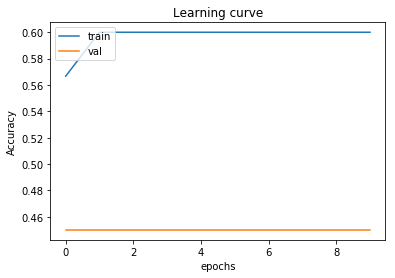

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Learning curve")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train','val'],loc= 'upper left')
plt.show()

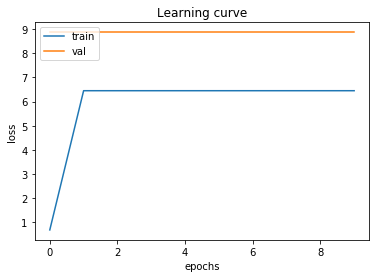

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Learning curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train','val'],loc='upper left')
plt.show()

In [38]:
print (classification_report(y_test,preds))

             precision    recall  f1-score   support

          0       0.45      1.00      0.62         9
          1       0.00      0.00      0.00        11

avg / total       0.20      0.45      0.28        20



/home/anierudh/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
cnf_matrix=confusion_matrix(y_test,preds)
print (cnf_matrix)

[[ 9  0]
 [11  0]]
